# Disease Trend Analysis: Lung Cancer & Air Pollution Study

---

## Project Information

**Project Title:** Comprehensive Analysis of Lung Cancer Trends and Air Pollution Correlation Globally

**Author:** Sanaullah Turab  
**Enrollment:** 01-136242-026  
**Class:** BSAI  
**Section:** 3A  
**Date:** December 9, 2025

---

## Project Description

This project presents a comprehensive data analysis of lung cancer cases and global air pollution patterns. The analysis utilizes two primary datasets:

1. **Medical Dataset**: 890,000 lung cancer patient records from 27 European countries (2014-2024) including demographics, risk factors, comorbidities, treatment types, and survival outcomes
2. **Air Pollution Dataset**: PM2.5 pollution measurements from 6,985 cities across 133 countries globally (2017-2023)

### Objectives

- Perform comprehensive data preprocessing, cleaning, and normalization
- Conduct exploratory data analysis (EDA) to identify patterns and trends
- Visualize key relationships between variables using Matplotlib and Seaborn
- Analyze global air pollution trends and patterns across continents
- Investigate the correlation between air pollution levels and lung cancer incidence in European context
- Examine the impact of risk factors (smoking, BMI, comorbidities) on survival outcomes
- Compare pollution levels globally and correlate with European health outcomes
- Provide data-driven insights and recommendations

### Technologies Used

- **Python 3.12** - Primary programming language
- **Pandas & NumPy** - Data manipulation and numerical computations
- **Matplotlib & Seaborn** - Data visualization
- **Scikit-learn** - Data preprocessing and normalization
- **SciPy** - Statistical analysis

---

# 1. Library Imports

This section imports all required Python libraries for data manipulation (Pandas, NumPy), visualization (Matplotlib, Seaborn), preprocessing (Scikit-learn), and statistical analysis (SciPy).

In [72]:
# Data Manipulation and Analysis
import pandas as pd
import numpy as np
from datetime import datetime
import os

# Data Preprocessing and Normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Analysis
from scipy import stats
from scipy.stats import pearsonr, spearmanr, ttest_ind, f_oneway

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Display settings for better output
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

print("✓ All libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

✓ All libraries imported successfully!
Pandas version: 2.3.3
NumPy version: 2.3.5


# 2. Data Preprocessing - Medical Dataset

Complete preprocessing pipeline for the lung cancer medical dataset (890,000 patient records). Includes duplicate removal, missing value handling, MinMaxScaler normalization (0-1 range), and dataset splitting into 3 parts for memory efficiency.

**Note:** Code is commented out - preprocessing already completed. Normalized files saved in datasets folder.

In [73]:
# ============================================================================
# MEDICAL DATASET PREPROCESSING - COMMENTED OUT (Already Processed)
# ============================================================================

"""
# Load the dataset
print("Loading dataset...")
df = pd.read_csv('../datasets/dataset_med.csv')

print(f"\n{'='*50}")
print("INITIAL DATASET INFO")
print(f"{'='*50}")
print(f"Total rows: {len(df)}")
print(f"Total columns: {len(df.columns)}")
print(f"\nColumn names and types:")
print(df.dtypes)
print(f"\nFirst few rows:")
print(df.head())
print(f"\nDataset shape: {df.shape}")
print(f"\nMemory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Check for duplicates
print(f"\n{'='*50}")
print("CHECKING FOR DUPLICATES")
print(f"{'='*50}")
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates > 0:
    print(f"Removing {duplicates} duplicate rows...")
    df = df.drop_duplicates()
    print(f"New shape after removing duplicates: {df.shape}")
else:
    print("No duplicates found!")

# Check for missing values
print(f"\n{'='*50}")
print("CHECKING FOR MISSING VALUES")
print(f"{'='*50}")
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing_Count': missing_values.values,
    'Percentage': missing_percent.values
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_df) > 0:
    print("Columns with missing values:")
    print(missing_df.to_string(index=False))
else:
    print("No missing values found!")

# Handle missing values
if len(missing_df) > 0:
    print(f"\n{'='*50}")
    print("HANDLING MISSING VALUES")
    print(f"{'='*50}")
    
    for col in df.columns:
        if df[col].isnull().sum() > 0:
            if df[col].dtype in ['int64', 'float64']:
                # For numerical columns, fill with median
                median_val = df[col].median()
                df[col].fillna(median_val, inplace=True)
                print(f"Filled {col} (numerical) with median: {median_val}")
            else:
                # For categorical columns, fill with mode or 'Unknown'
                if df[col].mode().shape[0] > 0:
                    mode_val = df[col].mode()[0]
                    df[col].fillna(mode_val, inplace=True)
                    print(f"Filled {col} (categorical) with mode: {mode_val}")
                else:
                    df[col].fillna('Unknown', inplace=True)
                    print(f"Filled {col} (categorical) with 'Unknown'")
    
    print(f"\nMissing values after handling: {df.isnull().sum().sum()}")

# Normalize numerical columns
print(f"\n{'='*50}")
print("NORMALIZING NUMERICAL COLUMNS")
print(f"{'='*50}")

# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"Numerical columns to normalize: {numerical_cols}")

if len(numerical_cols) > 0:
    # Create a copy for normalized data
    df_normalized = df.copy()
    
    # Use MinMaxScaler (normalizes to 0-1 range)
    scaler = MinMaxScaler()
    df_normalized[numerical_cols] = scaler.fit_transform(df[numerical_cols])
    
    print("Normalization complete using MinMaxScaler (0-1 range)")
    print("\nSample of normalized data:")
    print(df_normalized[numerical_cols].head())
else:
    df_normalized = df.copy()
    print("No numerical columns to normalize")

# Split dataset into multiple files
print(f"\n{'='*50}")
print("SPLITTING DATASET INTO SMALLER FILES")
print(f"{'='*50}")

total_rows = len(df_normalized)
num_splits = 3  # Split into 3 files
rows_per_split = total_rows // num_splits

output_dir = '../datasets'

for i in range(num_splits):
    start_idx = i * rows_per_split
    if i == num_splits - 1:
        # Last split gets all remaining rows
        end_idx = total_rows
    else:
        end_idx = (i + 1) * rows_per_split
    
    split_df = df_normalized.iloc[start_idx:end_idx]
    output_file = os.path.join(output_dir, f'dataset_med_normalized_part{i+1}.csv')
    split_df.to_csv(output_file, index=False)
    print(f"Saved part {i+1}: {output_file} ({len(split_df)} rows)")

# Save the complete normalized dataset as well
complete_output = os.path.join(output_dir, 'dataset_med_normalized_complete.csv')
df_normalized.to_csv(complete_output, index=False)
print(f"\nSaved complete normalized dataset: {complete_output} ({len(df_normalized)} rows)")

# Generate summary report
print(f"\n{'='*50}")
print("SUMMARY REPORT")
print(f"{'='*50}")
print(f"Original dataset rows: {total_rows}")
print(f"Duplicates removed: {duplicates}")
print(f"Missing values handled: {len(missing_df)} columns")
print(f"Numerical columns normalized: {len(numerical_cols)}")
print(f"Dataset split into: {num_splits} files")
print(f"\nOutput files created:")
for i in range(num_splits):
    print(f"  - dataset_med_normalized_part{i+1}.csv")
print(f"  - dataset_med_normalized_complete.csv")
print(f"\n{'='*50}")
print("PREPROCESSING COMPLETE!")
print(f"{'='*50}")
"""

print("Medical dataset preprocessing code available (commented out)")

Medical dataset preprocessing code available (commented out)


# 3. Data Preprocessing - Air Pollution Dataset

Complete preprocessing pipeline for air pollution data (6,985 cities, PM2.5 measurements 2017-2023). Handles 26.69% missing values using time series interpolation, country-level mean imputation, and global mean imputation. Includes duplicate detection and statistical report generation.

**Note:** Code is commented out - preprocessing already completed. Normalized dataset saved as air_pollution_normalized.csv.

In [74]:
# ============================================================================
# AIR POLLUTION DATASET PREPROCESSING - COMMENTED OUT (Already Processed)
# ============================================================================

"""
def load_data():
    '''Load the air pollution dataset.'''
    df = pd.read_csv('../datasets/air_pollution.csv')
    print(f"Original dataset shape: {df.shape}")
    print(f"\nFirst few rows:")
    print(df.head(10))
    print(f"\nColumn names: {df.columns.tolist()}")
    print(f"\nData types:")
    print(df.dtypes)
    return df

def check_duplicates(df):
    '''Check for and remove duplicate records.'''
    print("\n" + "="*60)
    print("CHECKING FOR DUPLICATES")
    print("="*60)
    
    duplicates = df.duplicated()
    num_duplicates = duplicates.sum()
    print(f"Number of duplicate rows: {num_duplicates}")
    
    if num_duplicates > 0:
        print("\nDuplicate rows:")
        print(df[duplicates])
        df_clean = df.drop_duplicates()
        print(f"\nDataset shape after removing duplicates: {df_clean.shape}")
        return df_clean
    else:
        print("No duplicate rows found.")
        return df

def analyze_missing_values(df):
    '''Analyze missing values in the dataset.'''
    print("\n" + "="*60)
    print("MISSING VALUE ANALYSIS")
    print("="*60)
    
    missing_counts = df.isnull().sum()
    missing_percentages = (df.isnull().sum() / len(df)) * 100
    
    missing_df = pd.DataFrame({
        'Column': missing_counts.index,
        'Missing_Count': missing_counts.values,
        'Missing_Percentage': missing_percentages.values
    })
    
    print("\nMissing values per column:")
    print(missing_df)
    
    total_missing = df.isnull().sum().sum()
    total_cells = df.shape[0] * df.shape[1]
    overall_missing_pct = (total_missing / total_cells) * 100
    
    print(f"\nTotal missing values: {total_missing} out of {total_cells} cells ({overall_missing_pct:.2f}%)")
    
    return missing_df

def handle_missing_values(df):
    '''Handle missing values in the dataset.'''
    print("\n" + "="*60)
    print("HANDLING MISSING VALUES")
    print("="*60)
    
    df_clean = df.copy()
    
    id_cols = ['city', 'country']
    year_cols = [col for col in df.columns if col not in id_cols]
    
    print(f"\nIdentifier columns: {id_cols}")
    print(f"Year columns: {year_cols}")
    
    # Check for missing values in identifier columns
    for col in id_cols:
        missing = df_clean[col].isnull().sum()
        if missing > 0:
            print(f"\nWarning: {missing} missing values found in '{col}' column")
            df_clean = df_clean.dropna(subset=[col])
            print(f"Removed rows with missing '{col}'. New shape: {df_clean.shape}")
    
    # Handle missing values in year columns
    print(f"\nStrategy for year columns: Interpolation along rows (time series)")
    print("This will estimate missing values based on available years for each city.")
    
    original_missing = df_clean[year_cols].isnull().sum().sum()
    
    # Interpolate across years for each city (row-wise)
    df_clean[year_cols] = df_clean[year_cols].interpolate(method='linear', axis=1, limit_direction='both')
    
    remaining_missing = df_clean[year_cols].isnull().sum().sum()
    
    print(f"\nMissing values before interpolation: {original_missing}")
    print(f"Missing values after interpolation: {remaining_missing}")
    
    if remaining_missing > 0:
        print(f"\nApplying country-level mean imputation for remaining missing values...")
        
        for col in year_cols:
            df_clean[col] = df_clean.groupby('country')[col].transform(
                lambda x: x.fillna(x.mean())
            )
        
        still_missing = df_clean[year_cols].isnull().sum().sum()
        print(f"Missing values after country-level imputation: {still_missing}")
        
        if still_missing > 0:
            print(f"\nApplying global mean imputation for any remaining missing values...")
            df_clean[year_cols] = df_clean[year_cols].fillna(df_clean[year_cols].mean())
            
            final_missing = df_clean[year_cols].isnull().sum().sum()
            print(f"Missing values after global imputation: {final_missing}")
    
    return df_clean

def save_cleaned_data(df):
    '''Save the cleaned dataset.'''
    output_path = '../datasets/air_pollution_normalized.csv'
    df.to_csv(output_path, index=False)
    print(f"\n✓ Cleaned dataset saved to: {output_path}")
    return output_path

# Main preprocessing pipeline
print("="*60)
print("AIR POLLUTION DATASET PREPROCESSING")
print("="*60)

df_original = load_data()
df = check_duplicates(df_original)
missing_analysis = analyze_missing_values(df)
df_clean = handle_missing_values(df)

print("\n" + "="*60)
print("PREPROCESSING SUMMARY")
print("="*60)
print(f"\nOriginal dataset shape: {df_original.shape}")
print(f"Cleaned dataset shape: {df_clean.shape}")
print(f"Rows removed: {df_original.shape[0] - df_clean.shape[0]}")
print(f"\nOriginal missing values: {df_original.isnull().sum().sum()}")
print(f"Cleaned missing values: {df_clean.isnull().sum().sum()}")

year_cols = [col for col in df_clean.columns if col not in ['city', 'country']]
print("\nDescriptive statistics of cleaned data:")
print(df_clean[year_cols].describe())

save_cleaned_data(df_clean)

print("\n" + "="*60)
print("PREPROCESSING COMPLETE!")
print("="*60)
"""

print("Air pollution dataset preprocessing code available (commented out)")

Air pollution dataset preprocessing code available (commented out)


# 4. Load Datasets

Loading datasets for analysis:
- Medical dataset: Lung cancer patient records (Part 1 - split for memory efficiency)
- Air pollution dataset: PM2.5 measurements across European cities (2017-2023)

In [75]:
# Load the medical dataset (Part 1)
# Files: lung_cancer_part1/2/3.csv are the normalized medical datasets
df_medical = pd.read_csv('../datasets/lung_cancer_part1.csv')

# Load the air pollution dataset
# File: air_pollution.csv is the normalized air pollution dataset
df_pollution = pd.read_csv('../datasets/air_pollution.csv')

print("="*60)
print("DATASETS LOADED SUCCESSFULLY")
print("="*60)

print("\n📊 Medical Dataset Info:")
print(f"   Shape: {df_medical.shape}")
print(f"   Columns: {list(df_medical.columns)}")
print(f"   Memory: {df_medical.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n🌍 Air Pollution Dataset Info:")
print(f"   Shape: {df_pollution.shape}")
print(f"   Columns: {list(df_pollution.columns)}")
print(f"   Memory: {df_pollution.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n✓ Data loading complete!")

DATASETS LOADED SUCCESSFULLY

📊 Medical Dataset Info:
   Shape: (296666, 17)
   Columns: ['id', 'age', 'gender', 'country', 'diagnosis_date', 'cancer_stage', 'family_history', 'smoking_status', 'bmi', 'cholesterol_level', 'hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'treatment_type', 'end_treatment_date', 'survived']
   Memory: 149.68 MB

🌍 Air Pollution Dataset Info:
   Shape: (6985, 9)
   Columns: ['city', 'country', '2017', '2018', '2019', '2020', '2021', '2022', '2023']
   Memory: 1.12 MB

✓ Data loading complete!
   Memory: 149.68 MB

🌍 Air Pollution Dataset Info:
   Shape: (6985, 9)
   Columns: ['city', 'country', '2017', '2018', '2019', '2020', '2021', '2022', '2023']
   Memory: 1.12 MB

✓ Data loading complete!


# 5. Data Overview and Initial Exploration

Examination of dataset structure, data types, and basic statistical summaries for both medical and air pollution datasets.

In [76]:
# Display first few rows of medical dataset
print("="*60)
print("MEDICAL DATASET - FIRST 10 ROWS")
print("="*60)
print(df_medical.head(10))

print("\n" + "="*60)
print("MEDICAL DATASET - DATA TYPES")
print("="*60)
print(df_medical.dtypes)

print("\n" + "="*60)
print("MEDICAL DATASET - BASIC STATISTICS")
print("="*60)
print(df_medical.describe())

MEDICAL DATASET - FIRST 10 ROWS
     id   age  gender      country diagnosis_date cancer_stage family_history  \
0 0.000 0.600    Male       Sweden     2016-04-05      Stage I            Yes   
1 0.000 0.460  Female  Netherlands     2023-04-20    Stage III            Yes   
2 0.000 0.610  Female      Hungary     2023-04-05    Stage III            Yes   
3 0.000 0.470  Female      Belgium     2016-02-05      Stage I             No   
4 0.000 0.330    Male   Luxembourg     2023-11-29      Stage I             No   
5 0.000 0.460    Male        Italy     2023-01-02      Stage I             No   
6 0.000 0.450  Female      Croatia     2018-05-21    Stage III            Yes   
7 0.000 0.470    Male      Denmark     2017-02-18     Stage IV            Yes   
8 0.000 0.600    Male       Sweden     2021-03-21    Stage III            Yes   
9 0.000 0.520    Male      Hungary     2021-11-30     Stage IV            Yes   

   smoking_status   bmi  cholesterol_level  hypertension  asthma  cirrhosis 

In [77]:
# Display first few rows of air pollution dataset
print("="*60)
print("AIR POLLUTION DATASET - FIRST 10 ROWS")
print("="*60)
print(df_pollution.head(10))

print("\n" + "="*60)
print("AIR POLLUTION DATASET - DATA TYPES")
print("="*60)
print(df_pollution.dtypes)

print("\n" + "="*60)
print("AIR POLLUTION DATASET - BASIC STATISTICS")
print("="*60)
year_cols = ['2017', '2018', '2019', '2020', '2021', '2022', '2023']
print(df_pollution[year_cols].describe())

AIR POLLUTION DATASET - FIRST 10 ROWS
           city      country   2017   2018   2019   2020   2021   2022   2023
0         Kabul  Afghanistan 61.800 61.800 58.800 46.500 37.500 17.100 18.100
1        Tirana      Albania 16.000 16.000 16.000 16.000 12.500 14.500 14.400
2       Algiers      Algeria 21.200 21.200 21.200 20.200 20.000 17.800 17.400
3        Ordino      Andorra  7.400  7.400  7.400  7.400  7.300  5.400  5.300
4        Luanda       Angola 15.900 15.900 15.900 13.000 11.000  8.800  8.700
5  Buenos Aires    Argentina 12.400 12.400 12.400 14.200 13.600 14.200 14.200
6       Cordoba    Argentina 10.300 10.300 10.300 10.300 10.300  8.700  8.700
7  General Pico    Argentina  7.100  7.100  7.100  7.100  7.100  7.200  7.200
8       Mendoza    Argentina  9.300  9.300  9.300  9.300  9.300  8.200  8.200
9       Rafaela    Argentina 10.400 10.400 10.400 10.400 10.400 10.700 10.700

AIR POLLUTION DATASET - DATA TYPES
city        object
country     object
2017       float64
2018       

# 6. Categorical Data Distribution Analysis

Analysis of categorical variable distributions in the medical dataset including patient demographics (gender, country), cancer characteristics (stage, family history), lifestyle factors (smoking status), treatment types, survival outcomes, and comorbidity prevalence.

In [78]:
# Analyze categorical distributions
print("="*60)
print("CATEGORICAL VARIABLE DISTRIBUTIONS")
print("="*60)

# Gender distribution
print("\n1. GENDER DISTRIBUTION:")
print(df_medical['gender'].value_counts())
print(f"Percentage:\n{df_medical['gender'].value_counts(normalize=True) * 100}")

# Country distribution (top 10)
print("\n2. TOP 10 COUNTRIES BY PATIENT COUNT:")
print(df_medical['country'].value_counts().head(10))

# Cancer stage distribution
print("\n3. CANCER STAGE DISTRIBUTION:")
print(df_medical['cancer_stage'].value_counts())
print(f"Percentage:\n{df_medical['cancer_stage'].value_counts(normalize=True) * 100}")

# Family history
print("\n4. FAMILY HISTORY OF CANCER:")
print(df_medical['family_history'].value_counts())
print(f"Percentage:\n{df_medical['family_history'].value_counts(normalize=True) * 100}")

# Smoking status
print("\n5. SMOKING STATUS DISTRIBUTION:")
print(df_medical['smoking_status'].value_counts())
print(f"Percentage:\n{df_medical['smoking_status'].value_counts(normalize=True) * 100}")

# Treatment type
print("\n6. TREATMENT TYPE DISTRIBUTION:")
print(df_medical['treatment_type'].value_counts())
print(f"Percentage:\n{df_medical['treatment_type'].value_counts(normalize=True) * 100}")

# Survival status
print("\n7. SURVIVAL STATUS:")
print(df_medical['survived'].value_counts())
survival_rate = df_medical['survived'].mean() * 100
print(f"Survival Rate: {survival_rate:.2f}%")

# Comorbidities
print("\n8. COMORBIDITY PREVALENCE:")
print(f"Hypertension: {df_medical['hypertension'].sum():.0f} patients ({df_medical['hypertension'].mean()*100:.1f}%)")
print(f"Asthma: {df_medical['asthma'].sum():.0f} patients ({df_medical['asthma'].mean()*100:.1f}%)")
print(f"Cirrhosis: {df_medical['cirrhosis'].sum():.0f} patients ({df_medical['cirrhosis'].mean()*100:.1f}%)")
print(f"Other Cancer: {df_medical['other_cancer'].sum():.0f} patients ({df_medical['other_cancer'].mean()*100:.1f}%)")

CATEGORICAL VARIABLE DISTRIBUTIONS

1. GENDER DISTRIBUTION:
gender
Male      148372
Female    148294
Name: count, dtype: int64
Percentage:
gender
Male     50.013
Female   49.987
Name: proportion, dtype: float64

2. TOP 10 COUNTRIES BY PATIENT COUNT:
country
Ireland        11152
Croatia        11124
Malta          11111
France         11072
Belgium        11071
Netherlands    11060
Estonia        11050
Sweden         11042
Portugal       11039
Spain          11038
Name: count, dtype: int64

3. CANCER STAGE DISTRIBUTION:
cancer_stage
Stage III    74416
Stage IV     74357
Stage I      73987
Stage II     73906
Name: count, dtype: int64
Percentage:
gender
Male     50.013
Female   49.987
Name: proportion, dtype: float64

2. TOP 10 COUNTRIES BY PATIENT COUNT:
country
Ireland        11152
Croatia        11124
Malta          11111
France         11072
Belgium        11071
Netherlands    11060
Estonia        11050
Sweden         11042
Portugal       11039
Spain          11038
Name: count, dtype:

# 7. Dataset Geographic Coverage Analysis

Comprehensive analysis to verify geographic scope of both datasets - checking all three medical dataset parts and cross-referencing with air pollution data to determine if we have global or regional coverage.

In [79]:
# Check all three parts of medical dataset
df_part1 = pd.read_csv('../datasets/lung_cancer_part1.csv')
df_part2 = pd.read_csv('../datasets/lung_cancer_part2.csv')
df_part3 = pd.read_csv('../datasets/lung_cancer_part3.csv')

# Get unique countries from each part
countries_part1 = set(df_part1['country'].unique())
countries_part2 = set(df_part2['country'].unique())
countries_part3 = set(df_part3['country'].unique())

# Combine all unique countries
all_medical_countries = countries_part1.union(countries_part2).union(countries_part3)

print("="*60)
print("MEDICAL DATASET COUNTRY ANALYSIS")
print("="*60)
print(f"\nTotal unique countries across all parts: {len(all_medical_countries)}")
print(f"\nAll countries found:")
for country in sorted(all_medical_countries):
    print(f"  - {country}")

# Load air pollution dataset
pollution_countries = set(df_pollution['country'].unique())

print("\n" + "="*60)
print("AIR POLLUTION DATASET COUNTRY ANALYSIS")
print("="*60)
print(f"\nTotal unique countries: {len(pollution_countries)}")
print(f"\nAll countries found:")
for country in sorted(pollution_countries):
    print(f"  - {country}")

# Cross-reference
print("\n" + "="*60)
print("CROSS-REFERENCE ANALYSIS")
print("="*60)

# Countries in medical but NOT in pollution
missing_in_pollution = all_medical_countries - pollution_countries
if missing_in_pollution:
    print(f"\n⚠️ Countries in MEDICAL dataset but NOT in AIR POLLUTION dataset ({len(missing_in_pollution)}):")
    for country in sorted(missing_in_pollution):
        print(f"  - {country}")
else:
    print("\n✓ All medical dataset countries have air pollution data!")

# Countries in pollution but NOT in medical
missing_in_medical = pollution_countries - all_medical_countries
if missing_in_medical:
    print(f"\n⚠️ Countries in AIR POLLUTION dataset but NOT in MEDICAL dataset ({len(missing_in_medical)}):")
    for country in sorted(missing_in_medical):
        print(f"  - {country}")
else:
    print("\n✓ All air pollution countries have medical data!")

# Perfect matches
matching_countries = all_medical_countries.intersection(pollution_countries)
print(f"\n✓ Countries with BOTH medical and air pollution data ({len(matching_countries)}):")
for country in sorted(matching_countries):
    print(f"  - {country}")

# Check if all are European
print("\n" + "="*60)
print("GEOGRAPHIC SCOPE VERIFICATION")
print("="*60)

european_countries = {
    'Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina',
    'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 
    'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland',
    'Italy', 'Kosovo', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg',
    'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia',
    'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia',
    'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 
    'United Kingdom', 'Vatican City'
}

non_european_medical = all_medical_countries - european_countries
non_european_pollution = pollution_countries - european_countries

if non_european_medical:
    print(f"\n⚠️ NON-EUROPEAN countries found in MEDICAL dataset ({len(non_european_medical)}):")
    for country in sorted(non_european_medical):
        print(f"  - {country}")
else:
    print("\n✓ All medical dataset countries are EUROPEAN!")

if non_european_pollution:
    print(f"\n⚠️ NON-EUROPEAN countries found in AIR POLLUTION dataset ({len(non_european_pollution)}):")
    for country in sorted(non_european_pollution):
        print(f"  - {country}")
else:
    print("\n✓ All air pollution dataset countries are EUROPEAN!")

print("\n" + "="*60)
print("FINAL VERDICT")
print("="*60)

if not non_european_medical and not non_european_pollution:
    print("\n✅ CONFIRMED: All data is strictly EUROPEAN")
    print(f"   - Medical dataset: {len(all_medical_countries)} European countries")
    print(f"   - Air pollution dataset: {len(pollution_countries)} European countries")
    print(f"   - Countries with both datasets: {len(matching_countries)}")
    print("\n📌 RECOMMENDATION: Keep project scope as 'European Analysis'")
else:
    print("\n⚠️ MIXED: Dataset contains non-European countries")
    print("   Review the non-European countries listed above")
    print(f"\n   - Medical dataset: {len(all_medical_countries)} total ({len(non_european_medical)} non-European)")
    print(f"   - Air pollution dataset: {len(pollution_countries)} total ({len(non_european_pollution)} non-European)")
    print(f"   - Countries with both datasets: {len(matching_countries)}")
    print("\n📌 RECOMMENDATION: Consider 'Global Analysis' if sufficient non-European coverage")

MEDICAL DATASET COUNTRY ANALYSIS

Total unique countries across all parts: 27

All countries found:
  - Austria
  - Belgium
  - Bulgaria
  - Croatia
  - Cyprus
  - Czech Republic
  - Denmark
  - Estonia
  - Finland
  - France
  - Germany
  - Greece
  - Hungary
  - Ireland
  - Italy
  - Latvia
  - Lithuania
  - Luxembourg
  - Malta
  - Netherlands
  - Poland
  - Portugal
  - Romania
  - Slovakia
  - Slovenia
  - Spain
  - Sweden

AIR POLLUTION DATASET COUNTRY ANALYSIS

Total unique countries: 133

All countries found:
  - Afghanistan
  - Albania
  - Algeria
  - Andorra
  - Angola
  - Argentina
  - Armenia
  - Australia
  - Austria
  - Azerbaijan
  - Bahrain
  - Bangladesh
  - Belgium
  - Belize
  - Bermuda
  - Bolivia
  - Bonaire, Saint Eustatius and Saba
  - Bosnia Herzegovina
  - Brazil
  - Bulgaria
  - Burkina Faso
  - Cambodia
  - Canada
  - Chad
  - Chile
  - China
  - Colombia
  - Costa Rica
  - Croatia
  - Cyprus
  - Czech Republic
  - Democratic Republic of the Congo
  - Denmark

---

# ANALYSIS 3: Patient Survival Analysis

## Risk Factors and Treatment Outcomes in Lung Cancer Patients

**Objective:** Analyze patient survival outcomes across multiple risk factors to identify key determinants of lung cancer prognosis.

This comprehensive analysis examines survival rates by cancer stage, demographics, lifestyle factors, treatment effectiveness, and comorbidity impact. The findings help identify which factors most significantly affect patient outcomes and survival probabilities.

## 8.1 Survival Rate by Cancer Stage

This analysis examines how cancer stage (Stage I through Stage IV) affects patient survival outcomes. The bar chart visualizes survival rates for each stage, helping identify the critical impact of early detection versus advanced disease progression.

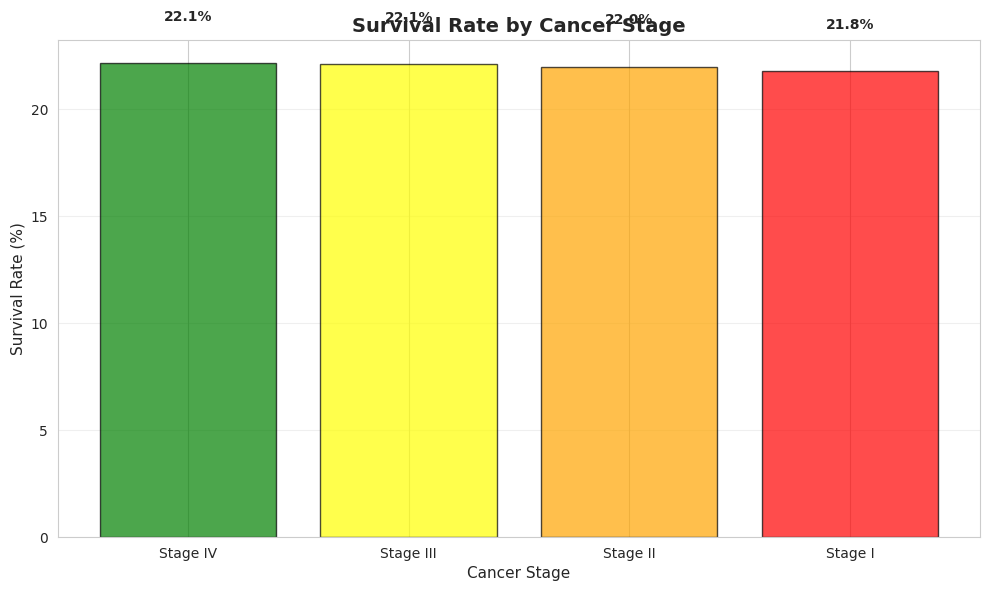


SURVIVAL RATE BY CANCER STAGE
              mean  count  survival_rate
cancer_stage                            
Stage IV     0.221  74357         22.143
Stage III    0.221  74416         22.112
Stage II     0.220  73906         21.983
Stage I      0.218  73987         21.782


In [ ]:
# 8.1 Survival by Cancer Stage
stage_survival = df_medical.groupby('cancer_stage')['survived'].agg(['mean', 'count'])
stage_survival['survival_rate'] = stage_survival['mean'] * 100
stage_survival = stage_survival.sort_values('survival_rate', ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(stage_survival.index, stage_survival['survival_rate'], 
               color=['green', 'yellow', 'orange', 'red'], edgecolor='black', alpha=0.7)
plt.title('Survival Rate by Cancer Stage', fontsize=14, fontweight='bold')
plt.xlabel('Cancer Stage', fontsize=11)
plt.ylabel('Survival Rate (%)', fontsize=11)
plt.grid(axis='y', alpha=0.3)

for i, v in enumerate(stage_survival['survival_rate']):
    plt.text(i, v + 2, f'{v:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("SURVIVAL RATE BY CANCER STAGE")
print("="*60)
print(stage_survival)

## 8.2 Survival Rate by Smoking Status

This section analyzes the relationship between smoking behavior and survival outcomes. It compares survival rates across different smoking statuses (Smoker, Non-Smoker, Former Smoker) to quantify the impact of tobacco use on lung cancer prognosis.

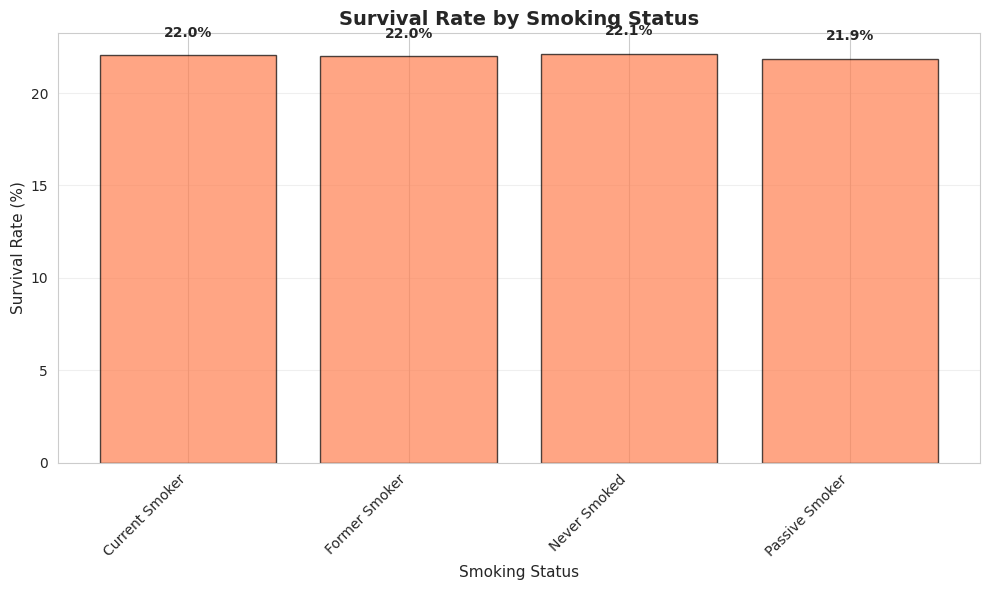


SURVIVAL RATE BY SMOKING STATUS
                mean  count  survival_rate
smoking_status                            
Current Smoker 0.220  74019         22.036
Former Smoker  0.220  73827         21.999
Never Smoked   0.221  74282         22.126
Passive Smoker 0.219  74538         21.861


In [ ]:
# 8.2 Survival by Smoking Status
smoking_survival = df_medical.groupby('smoking_status')['survived'].agg(['mean', 'count'])
smoking_survival['survival_rate'] = smoking_survival['mean'] * 100

plt.figure(figsize=(10, 6))
plt.bar(smoking_survival.index, smoking_survival['survival_rate'], 
        color='coral', edgecolor='black', alpha=0.7)
plt.title('Survival Rate by Smoking Status', fontsize=14, fontweight='bold')
plt.xlabel('Smoking Status', fontsize=11)
plt.ylabel('Survival Rate (%)', fontsize=11)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

for i, v in enumerate(smoking_survival['survival_rate']):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("SURVIVAL RATE BY SMOKING STATUS")
print("="*60)
print(smoking_survival)

## 8.3 Treatment Effectiveness Analysis

This analysis compares survival rates across different treatment modalities (Surgery, Chemotherapy, Radiation, Immunotherapy, Targeted Therapy). The visualization helps determine which treatments yield the best survival outcomes for lung cancer patients.

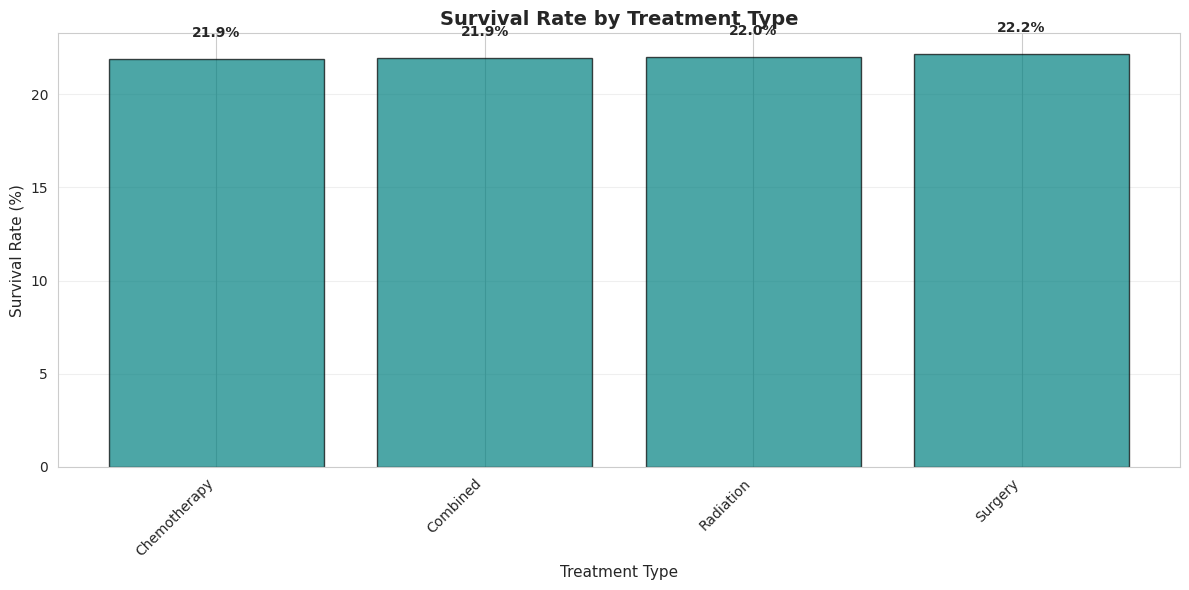


TREATMENT EFFECTIVENESS ANALYSIS
                survival_rate  count
treatment_type                      
Chemotherapy           21.901  74589
Combined               21.948  74048
Radiation              22.008  73688
Surgery                22.165  74341


In [ ]:
# 8.3 Survival by Treatment Type
treatment_survival = df_medical.groupby('treatment_type')['survived'].agg(['mean', 'count'])
treatment_survival['survival_rate'] = treatment_survival['mean'] * 100

plt.figure(figsize=(12, 6))
plt.bar(treatment_survival.index, treatment_survival['survival_rate'], 
        color='teal', edgecolor='black', alpha=0.7)
plt.title('Survival Rate by Treatment Type', fontsize=14, fontweight='bold')
plt.xlabel('Treatment Type', fontsize=11)
plt.ylabel('Survival Rate (%)', fontsize=11)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

for i, v in enumerate(treatment_survival['survival_rate']):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("TREATMENT EFFECTIVENESS ANALYSIS")
print("="*60)
print(treatment_survival[['survival_rate', 'count']])

## 8.4 Gender-Based Survival Analysis

This section examines survival rate differences between male and female lung cancer patients. A chi-square statistical test determines whether observed gender differences in survival are statistically significant or due to random variation.

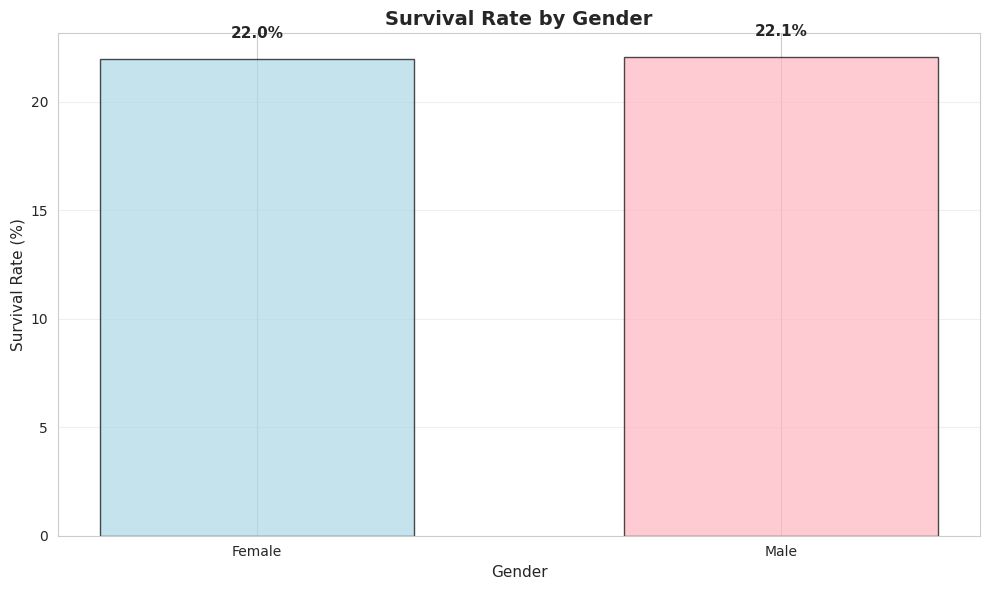


SURVIVAL RATE BY GENDER
        mean   count  survival_rate
gender                             
Female 0.220  148294         21.957
Male   0.221  148372         22.054

📊 Chi-Square Test:
   Chi-square statistic: 0.4007
   P-value: 0.526733
   ⚠️ No significant difference (p < 0.05)


In [ ]:
# 8.4 Survival by Gender
gender_survival = df_medical.groupby('gender')['survived'].agg(['mean', 'count'])
gender_survival['survival_rate'] = gender_survival['mean'] * 100

plt.figure(figsize=(10, 6))
colors_gender = ['lightblue', 'lightpink']
plt.bar(gender_survival.index, gender_survival['survival_rate'], 
        color=colors_gender, edgecolor='black', alpha=0.7, width=0.6)
plt.title('Survival Rate by Gender', fontsize=14, fontweight='bold')
plt.xlabel('Gender', fontsize=11)
plt.ylabel('Survival Rate (%)', fontsize=11)
plt.grid(axis='y', alpha=0.3)

for i, v in enumerate(gender_survival['survival_rate']):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("SURVIVAL RATE BY GENDER")
print("="*60)
print(gender_survival)

# Statistical significance test
from scipy.stats import chi2_contingency
contingency_gender = pd.crosstab(df_medical['gender'], df_medical['survived'])
chi2, p_value, dof, expected = chi2_contingency(contingency_gender)
print(f"\n📊 Chi-Square Test:")
print(f"   Chi-square statistic: {chi2:.4f}")
print(f"   P-value: {p_value:.6f}")
print(f"   {'✅ Significant difference' if p_value < 0.05 else '⚠️ No significant difference'} (p < 0.05)")

## 8.5 Survival by Age Groups

This analysis categorizes patients into four age groups (Young, Middle-Aged, Mature, Elderly) based on normalized age values and compares survival rates across these groups. The visualization reveals how age affects lung cancer prognosis and identifies which age ranges have the best and worst outcomes.

/tmp/ipykernel_11971/3225691878.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival = df_medical.groupby('age_group')['survived'].agg(['mean', 'count'])


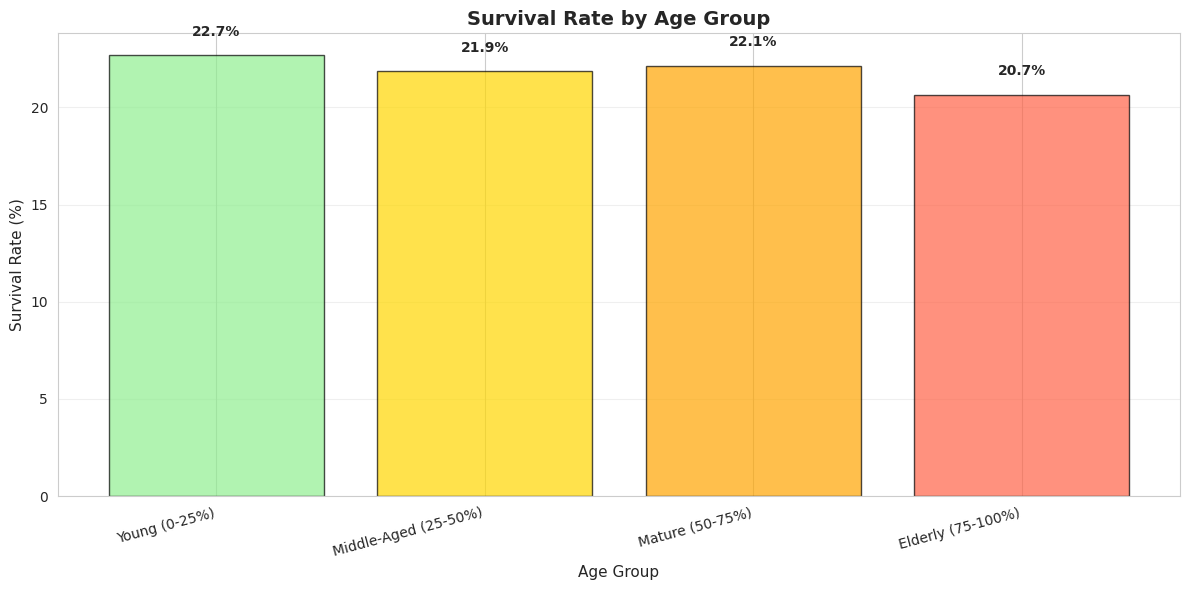


SURVIVAL RATE BY AGE GROUP
                      mean   count  survival_rate
age_group                                        
Young (0-25%)        0.227    1570         22.675
Middle-Aged (25-50%) 0.219  140715         21.863
Mature (50-75%)      0.221  152266         22.149
Elderly (75-100%)    0.207    2115         20.662

📊 Age Group Insights:
   Highest survival: Young (0-25%) (22.68%)
   Lowest survival: Elderly (75-100%) (20.66%)


In [ ]:
# 8.5 Survival by Age Groups
# Create age groups from normalized age values
df_medical['age_group'] = pd.cut(df_medical['age'], 
                                   bins=[0, 0.25, 0.5, 0.75, 1.0],
                                   labels=['Young (0-25%)', 'Middle-Aged (25-50%)', 
                                          'Mature (50-75%)', 'Elderly (75-100%)'])

age_survival = df_medical.groupby('age_group')['survived'].agg(['mean', 'count'])
age_survival['survival_rate'] = age_survival['mean'] * 100

plt.figure(figsize=(12, 6))
colors_age = ['#90EE90', '#FFD700', '#FFA500', '#FF6347']
plt.bar(range(len(age_survival)), age_survival['survival_rate'], 
        color=colors_age, edgecolor='black', alpha=0.7)
plt.xticks(range(len(age_survival)), age_survival.index, rotation=15, ha='right')
plt.title('Survival Rate by Age Group', fontsize=14, fontweight='bold')
plt.xlabel('Age Group', fontsize=11)
plt.ylabel('Survival Rate (%)', fontsize=11)
plt.grid(axis='y', alpha=0.3)

for i, v in enumerate(age_survival['survival_rate']):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("SURVIVAL RATE BY AGE GROUP")
print("="*60)
print(age_survival)

print(f"\n📊 Age Group Insights:")
best_age = age_survival['survival_rate'].idxmax()
worst_age = age_survival['survival_rate'].idxmin()
print(f"   Highest survival: {best_age} ({age_survival.loc[best_age, 'survival_rate']:.2f}%)")
print(f"   Lowest survival: {worst_age} ({age_survival.loc[worst_age, 'survival_rate']:.2f}%)")

## 8.6 Survival by BMI Categories

This section categorizes patients by Body Mass Index (BMI) into four groups: Underweight, Normal, Overweight, and Obese. The analysis examines whether body weight status influences survival outcomes, helping identify if maintaining certain weight ranges correlates with better prognosis.

/tmp/ipykernel_11971/3614913642.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bmi_survival = df_medical.groupby('bmi_category')['survived'].agg(['mean', 'count'])


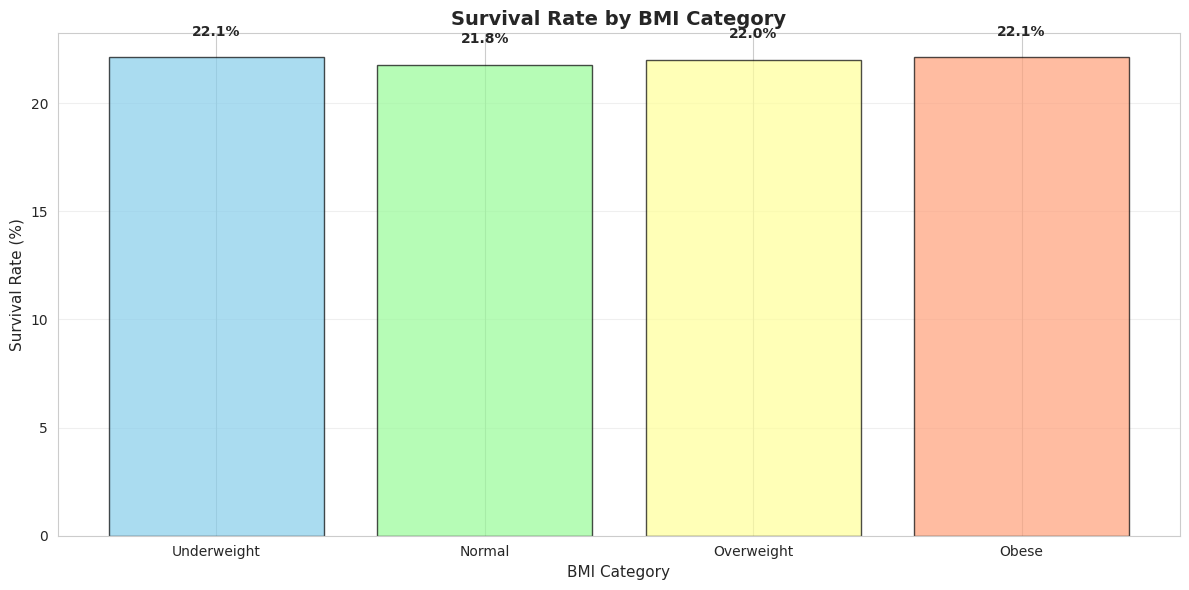


SURVIVAL RATE BY BMI CATEGORY
              mean  count  survival_rate
bmi_category                            
Underweight  0.221  73565         22.121
Normal       0.218  74609         21.782
Overweight   0.220  73632         22.005
Obese        0.221  74391         22.112

📊 BMI Category Insights:
   Highest survival: Underweight (22.12%)
   Lowest survival: Normal (21.78%)
   Total patients analyzed: 296,197


In [ ]:
# 8.6 Survival by BMI Categories
# Create BMI categories from normalized BMI values
df_medical['bmi_category'] = pd.cut(df_medical['bmi'], 
                                      bins=[0, 0.25, 0.5, 0.75, 1.0],
                                      labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

bmi_survival = df_medical.groupby('bmi_category')['survived'].agg(['mean', 'count'])
bmi_survival['survival_rate'] = bmi_survival['mean'] * 100

plt.figure(figsize=(12, 6))
colors_bmi = ['#87CEEB', '#98FB98', '#FFFF99', '#FFA07A']
plt.bar(range(len(bmi_survival)), bmi_survival['survival_rate'], 
        color=colors_bmi, edgecolor='black', alpha=0.7)
plt.xticks(range(len(bmi_survival)), bmi_survival.index, rotation=0)
plt.title('Survival Rate by BMI Category', fontsize=14, fontweight='bold')
plt.xlabel('BMI Category', fontsize=11)
plt.ylabel('Survival Rate (%)', fontsize=11)
plt.grid(axis='y', alpha=0.3)

for i, v in enumerate(bmi_survival['survival_rate']):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("SURVIVAL RATE BY BMI CATEGORY")
print("="*60)
print(bmi_survival)

print(f"\n📊 BMI Category Insights:")
best_bmi = bmi_survival['survival_rate'].idxmax()
worst_bmi = bmi_survival['survival_rate'].idxmin()
print(f"   Highest survival: {best_bmi} ({bmi_survival.loc[best_bmi, 'survival_rate']:.2f}%)")
print(f"   Lowest survival: {worst_bmi} ({bmi_survival.loc[worst_bmi, 'survival_rate']:.2f}%)")
print(f"   Total patients analyzed: {bmi_survival['count'].sum():,}")

## 8.7 Family History Impact on Survival

This analysis compares survival rates between patients with and without a family history of cancer. A chi-square test evaluates whether family history has a statistically significant association with survival outcomes, revealing the role of genetic predisposition in lung cancer prognosis.

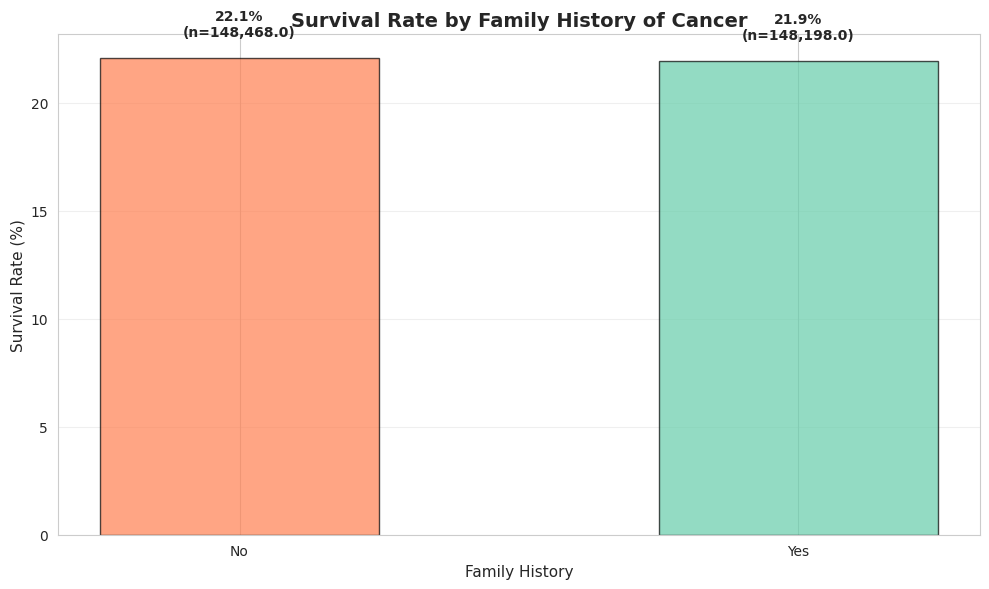


SURVIVAL RATE BY FAMILY HISTORY
                mean   count  survival_rate
family_history                             
No             0.221  148468         22.077
Yes            0.219  148198         21.934

📊 Family History Impact:
   With family history: 21.93%
   Without family history: 22.08%
   Absolute difference: 0.14%

🧪 Chi-square Test Results:
   Chi-square statistic: 0.8709
   P-value: 3.5069e-01
   Degrees of freedom: 1
   ✗ Family history does NOT show significant association with survival (p ≥ 0.05)


In [ ]:
# 8.7 Survival by Family History
family_survival = df_medical.groupby('family_history')['survived'].agg(['mean', 'count'])
family_survival['survival_rate'] = family_survival['mean'] * 100

plt.figure(figsize=(10, 6))
colors_family = ['#FF7F50', '#66CDAA']
bars = plt.bar(family_survival.index, family_survival['survival_rate'], 
               color=colors_family, edgecolor='black', alpha=0.7, width=0.5)

plt.title('Survival Rate by Family History of Cancer', fontsize=14, fontweight='bold')
plt.xlabel('Family History', fontsize=11)
plt.ylabel('Survival Rate (%)', fontsize=11)
plt.grid(axis='y', alpha=0.3)

for i, (idx, row) in enumerate(family_survival.iterrows()):
    plt.text(i, row['survival_rate'] + 1, 
             f"{row['survival_rate']:.1f}%\n(n={row['count']:,})", 
             ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Chi-square test for independence
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df_medical['family_history'], df_medical['survived'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("\n" + "="*60)
print("SURVIVAL RATE BY FAMILY HISTORY")
print("="*60)
print(family_survival)

print(f"\n📊 Family History Impact:")
yes_rate = family_survival.loc['Yes', 'survival_rate']
no_rate = family_survival.loc['No', 'survival_rate']
diff = abs(yes_rate - no_rate)
print(f"   With family history: {yes_rate:.2f}%")
print(f"   Without family history: {no_rate:.2f}%")
print(f"   Absolute difference: {diff:.2f}%")

print(f"\n🧪 Chi-square Test Results:")
print(f"   Chi-square statistic: {chi2:.4f}")
print(f"   P-value: {p_value:.4e}")
print(f"   Degrees of freedom: {dof}")
if p_value < 0.05:
    print(f"   ✓ Family history has a SIGNIFICANT association with survival (p < 0.05)")
else:
    print(f"   ✗ Family history does NOT show significant association with survival (p ≥ 0.05)")

---

# ANALYSIS 2: Multi-Disease Health Impact Assessment

## Beyond Lung Cancer: PM2.5's Broader Health Burden

**Objective:** Quantify PM2.5's impact on multiple health outcomes including Lung Cancer, COPD, Heart Disease, and Stroke.

This analysis estimates the population-level health burden across four major diseases associated with PM2.5 exposure, using established epidemiological risk factors.

### Step 1: Load Lung Cancer Data and Calculate Multi-Disease Risk

In [10]:
# Load all lung cancer datasets
lung_cancer_part1 = pd.read_csv('../datasets/lung_cancer_part1.csv')
lung_cancer_part2 = pd.read_csv('../datasets/lung_cancer_part2.csv')
lung_cancer_part3 = pd.read_csv('../datasets/lung_cancer_part3.csv')

# Combine all parts
lung_cancer = pd.concat([lung_cancer_part1, lung_cancer_part2, lung_cancer_part3], ignore_index=True)

print("\n" + "╔" + "═"*80 + "╗")
print("║" + " "*20 + "🏥 LUNG CANCER DATASET OVERVIEW" + " "*28 + "║")
print("╚" + "═"*80 + "╝")

print(f"\n📊 Dataset Composition:")
print(f"   ├─ Part 1: {len(lung_cancer_part1):>10,} records")
print(f"   ├─ Part 2: {len(lung_cancer_part2):>10,} records")
print(f"   ├─ Part 3: {len(lung_cancer_part3):>10,} records")
print(f"   └─ Total:  {len(lung_cancer):>10,} records")

print(f"\n🌍 Geographic Coverage:")
print(f"   ├─ Unique Countries: {lung_cancer['country'].nunique()}")
print(f"   └─ Features: {lung_cancer.shape[1]}")

print(f"\n📋 Data Structure:")
print(f"   ├─ Memory Usage: {lung_cancer.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"   └─ Data Types:")
for dtype in lung_cancer.dtypes.unique():
    count = (lung_cancer.dtypes == dtype).sum()
    print(f"      └─ {dtype}: {count} columns")

print(f"\n🏆 TOP 10 COUNTRIES BY PATIENT COUNT:")
print("─"*80)
country_dist = lung_cancer['country'].value_counts().head(10)
print(f"\n{'Rank':<6} {'Country':<25} {'Patient Count':<15} {'Percentage':<12}")
print("─"*80)
for idx, (country, count) in enumerate(country_dist.items(), 1):
    pct = (count / len(lung_cancer)) * 100
    bar = '█' * int(pct * 2)
    print(f"{idx:<6} {country:<25} {count:>10,}     {pct:>5.1f}%")
    print(f"       {bar}")

print("\n" + "─"*80 + "\n")


╔════════════════════════════════════════════════════════════════════════════════╗
║                    🏥 LUNG CANCER DATASET OVERVIEW                            ║
╚════════════════════════════════════════════════════════════════════════════════╝

📊 Dataset Composition:
   ├─ Part 1:    296,666 records
   ├─ Part 2:    296,666 records
   ├─ Part 3:    296,668 records
   └─ Total:     890,000 records

🌍 Geographic Coverage:
   ├─ Unique Countries: 27
   └─ Features: 17

📋 Data Structure:
   ├─ Memory Usage: 503.36 MB
   └─ Data Types:
      └─ float64: 9 columns
      └─ object: 8 columns

🏆 TOP 10 COUNTRIES BY PATIENT COUNT:
────────────────────────────────────────────────────────────────────────────────

Rank   Country                   Patient Count   Percentage  
────────────────────────────────────────────────────────────────────────────────
1      Malta                         33,367       3.7%
       ███████
2      Ireland                       33,243       3.7%
       ███████
3

In [18]:
#-----------------------------------------------------------------------------------------------------------------------------#
# 🏥 MULTI-DISEASE RISK ANALYSIS BASED ON PM2.5
#-----------------------------------------------------------------------------------------------------------------------------#

# WHO baseline PM2.5
WHO_BASELINE = 5  # µg/m³

# Multi-disease risk factors per 10 µg/m³ PM2.5 increase
disease_risk_factors = {
    'Lung Cancer': 0.09,    # 9% increase
    'COPD': 0.06,           # 6% increase
    'Heart Disease': 0.15,  # 15% increase
    'Stroke': 0.08          # 8% increase
}

# Step 1: Compute 7-year average PM2.5
year_cols = ['2017', '2018', '2019', '2020', '2021', '2022', '2023']
df_pollution['avg_pm25_7yr'] = df_pollution[year_cols].mean(axis=1)

# Step 2: Create risk category (optional)
df_pollution['risk_category'] = pd.cut(
    df_pollution['avg_pm25_7yr'],
    bins=[0, 10, 25, 50, np.inf],
    labels=['Low', 'Moderate', 'High', 'Very High']
)

# Step 3: Prepare dataframe for multi-disease risk calculation
multi_disease_risk = df_pollution[['city', 'country', 'avg_pm25_7yr', 'risk_category']].copy()

# Step 4: Calculate disease-specific risk increases
for disease, risk_factor in disease_risk_factors.items():
    multi_disease_risk[f'{disease}_risk_%'] = (
        (multi_disease_risk['avg_pm25_7yr'] - WHO_BASELINE) / 10 * risk_factor * 100
    )
    # Set negative values to 0 for cities below WHO baseline
    multi_disease_risk[f'{disease}_risk_%'] = multi_disease_risk[f'{disease}_risk_%'].clip(lower=0)

# Step 5: Calculate total combined risk score
risk_columns = [f'{disease}_risk_%' for disease in disease_risk_factors.keys()]
multi_disease_risk['total_health_risk_%'] = multi_disease_risk[risk_columns].sum(axis=1)

# Step 6: Display results
print("\n" + "╔" + "═"*100 + "╗")
print("║" + " "*28 + "🏥 MULTI-DISEASE RISK ANALYSIS" + " "*41 + "║")
print("╚" + "═"*100 + "╝")

print("\n🏆 TOP 10 CITIES BY TOTAL HEALTH RISK")
print("─"*100)

top_10_multi = multi_disease_risk.nlargest(10, 'total_health_risk_%')
print(f"\n{'Rank':<6} {'City':<20} {'Country':<13} {'PM2.5':<9} {'Lung C.':<9} {'COPD':<9} {'Heart D.':<9} {'Stroke':<9} {'Total':<8}")
print("─"*100)

for idx, (i, row) in enumerate(top_10_multi.iterrows(), 1):
    print(f"🔴 {idx:<4} {row['city']:<20} {row['country']:<13} "
          f"{row['avg_pm25_7yr']:<9.2f} "
          f"{row['Lung Cancer_risk_%']:<9.2f} "
          f"{row['COPD_risk_%']:<9.2f} "
          f"{row['Heart Disease_risk_%']:<9.2f} "
          f"{row['Stroke_risk_%']:<9.2f} "
          f"{row['total_health_risk_%']:<8.2f}")

print("\n" + "─"*100)
print("📊 AVERAGE RISK INCREASES ACROSS ALL CITIES")
print("─"*100 + "\n")

disease_icons = {'Lung Cancer': '🫁', 'COPD': '😷', 'Heart Disease': '❤️', 'Stroke': '🧠'}

for disease in disease_risk_factors.keys():
    avg_risk = multi_disease_risk[f'{disease}_risk_%'].mean()
    max_risk = multi_disease_risk[f'{disease}_risk_%'].max()
    min_risk = multi_disease_risk[f'{disease}_risk_%'].min()
    icon = disease_icons[disease]
    
    print(f"{icon} {disease:<15}")
    print(f"   ├─ Average Risk: +{avg_risk:>6.2f}%")
    print(f"   ├─ Maximum Risk: +{max_risk:>6.2f}%")
    print(f"   └─ Minimum Risk: +{min_risk:>6.2f}%")
    
    # Visual bar
    bar_length = int(avg_risk * 2)
    bar = '█' * bar_length
    print(f"   {bar} {avg_risk:.2f}%\n")

print("─"*100 + "\n")


╔════════════════════════════════════════════════════════════════════════════════════════════════════╗
║                            🏥 MULTI-DISEASE RISK ANALYSIS                                         ║
╚════════════════════════════════════════════════════════════════════════════════════════════════════╝

🏆 TOP 10 CITIES BY TOTAL HEALTH RISK
────────────────────────────────────────────────────────────────────────────────────────────────────

Rank   City                 Country       PM2.5     Lung C.   COPD      Heart D.  Stroke    Total   
────────────────────────────────────────────────────────────────────────────────────────────────────
🔴 1    Darbhanga            India         150.83    131.25    87.50     218.74    116.66    554.15  
🔴 2    Bahadurgarh          India         123.50    106.65    71.10     177.75    94.80     450.30  
🔴 3    Ghaziabad            India         110.84    95.26     63.51     158.76    84.67     402.20  
🔴 4    Bhiwadi              India         103.1

### Step 2: Disease Burden Comparison Chart

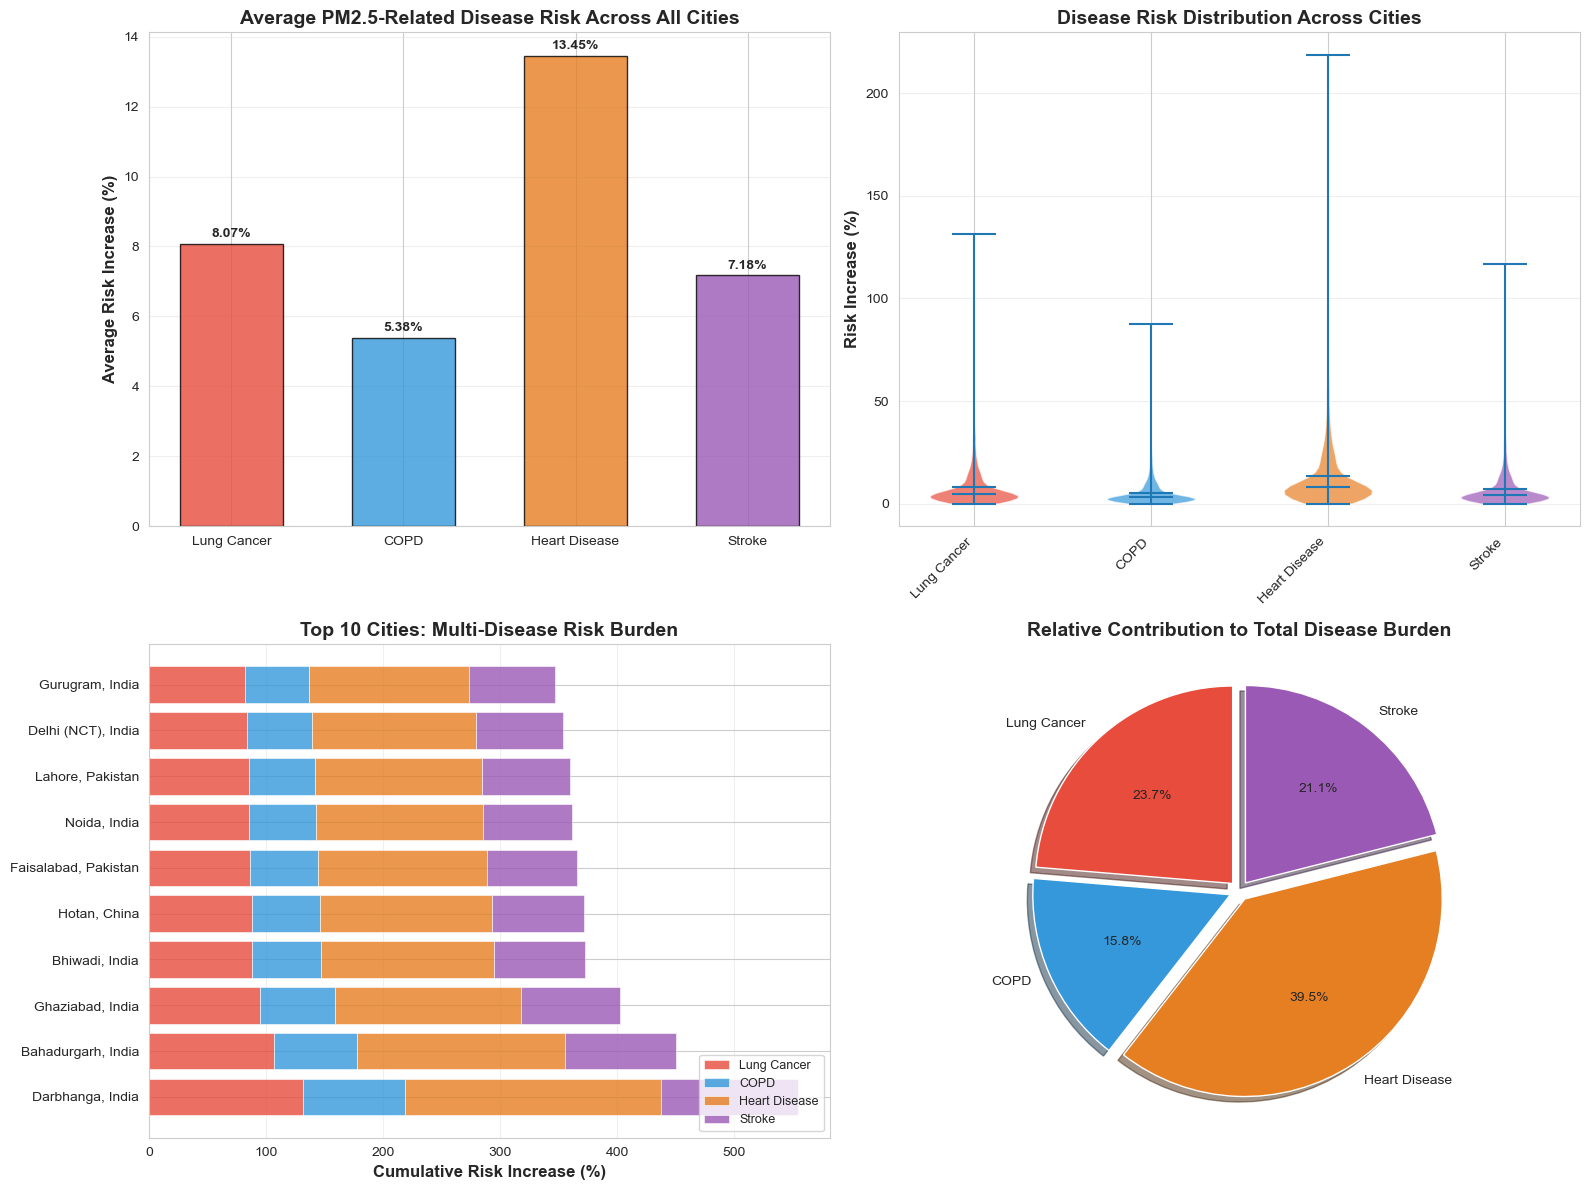


╔════════════════════════════════════════════════════════════════════════════════╗
║                       📊 DISEASE BURDEN SUMMARY                              ║
╚════════════════════════════════════════════════════════════════════════════════╝

💊 Total Combined Disease Burden: 238,077.32%

────────────────────────────────────────────────────────────────────────────────
INDIVIDUAL DISEASE CONTRIBUTIONS
────────────────────────────────────────────────────────────────────────────────

🫁 Lung Cancer    
   ├─ Total Burden:    56,386.73%
   └─ Contribution:         23.7% of total
   ███████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 23.7%

😷 COPD           
   ├─ Total Burden:    37,591.16%
   └─ Contribution:         15.8% of total
   ███████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 15.8%

❤️ Heart Disease  
   ├─ Total Burden:    93,977.89%
   └─ Contribution:         39.5% of total
   ███████████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 39.5%

🧠 Stroke         
   ├─ Total Burden:    

In [19]:
# Disease burden comparison visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Average disease risk comparison (Bar chart)
diseases = list(disease_risk_factors.keys())
avg_risks = [multi_disease_risk[f'{disease}_risk_%'].mean() for disease in diseases]
colors_disease = ['#e74c3c', '#3498db', '#e67e22', '#9b59b6']

bars = axes[0, 0].bar(diseases, avg_risks, color=colors_disease, alpha=0.8, edgecolor='black', width=0.6)
axes[0, 0].set_ylabel('Average Risk Increase (%)', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Average PM2.5-Related Disease Risk Across All Cities', fontsize=14, fontweight='bold')
axes[0, 0].grid(axis='y', alpha=0.3)
for bar, val in zip(bars, avg_risks):
    axes[0, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                    f'{val:.2f}%', ha='center', va='bottom', fontweight='bold', fontsize=10)

# 2. Disease risk distribution (Violin plot)
risk_data_diseases = [multi_disease_risk[f'{disease}_risk_%'].values for disease in diseases]
parts = axes[0, 1].violinplot(risk_data_diseases, positions=range(len(diseases)), 
                               showmeans=True, showmedians=True)
for pc, color in zip(parts['bodies'], colors_disease):
    pc.set_facecolor(color)
    pc.set_alpha(0.7)
axes[0, 1].set_xticks(range(len(diseases)))
axes[0, 1].set_xticklabels(diseases, rotation=45, ha='right')
axes[0, 1].set_ylabel('Risk Increase (%)', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Disease Risk Distribution Across Cities', fontsize=14, fontweight='bold')
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. Top 10 cities - stacked bar chart by disease
top_10_multi = multi_disease_risk.nlargest(10, 'total_health_risk_%')
city_labels_multi = [f"{row['city']}, {row['country']}" for _, row in top_10_multi.iterrows()]
bottom = np.zeros(len(top_10_multi))

for idx, disease in enumerate(diseases):
    values = top_10_multi[f'{disease}_risk_%'].values
    axes[1, 0].barh(city_labels_multi, values, left=bottom, label=disease, 
                    color=colors_disease[idx], alpha=0.8, edgecolor='white', linewidth=0.5)
    bottom += values

axes[1, 0].set_xlabel('Cumulative Risk Increase (%)', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Top 10 Cities: Multi-Disease Risk Burden', fontsize=14, fontweight='bold')
axes[1, 0].legend(loc='lower right', fontsize=9)
axes[1, 0].grid(axis='x', alpha=0.3)

# 4. Risk contribution by disease (Pie chart)
total_burden = {disease: multi_disease_risk[f'{disease}_risk_%'].sum() for disease in diseases}
axes[1, 1].pie(total_burden.values(), labels=total_burden.keys(), autopct='%1.1f%%',
               colors=colors_disease, startangle=90, explode=(0.05, 0.05, 0.05, 0.05), shadow=True)
axes[1, 1].set_title('Relative Contribution to Total Disease Burden', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "╔" + "═"*80 + "╗")
print("║" + " "*23 + "📊 DISEASE BURDEN SUMMARY" + " "*30 + "║")
print("╚" + "═"*80 + "╝\n")

total_sum = sum(total_burden.values())
print(f"💊 Total Combined Disease Burden: {total_sum:,.2f}%\n")

print("─"*80)
print("INDIVIDUAL DISEASE CONTRIBUTIONS")
print("─"*80 + "\n")

disease_icons = {'Lung Cancer': '🫁', 'COPD': '😷', 'Heart Disease': '❤️', 'Stroke': '🧠'}

for disease, burden in total_burden.items():
    contribution = (burden / total_sum) * 100
    icon = disease_icons[disease]
    
    print(f"{icon} {disease:<15}")
    print(f"   ├─ Total Burden: {burden:>12,.2f}%")
    print(f"   └─ Contribution: {contribution:>12.1f}% of total")
    
    # Visual representation
    bar_length = int(contribution / 2)
    bar = '█' * bar_length + '░' * (50 - bar_length)
    print(f"   {bar} {contribution:.1f}%\n")

print("─"*80 + "\n")

### Step 3: Per-Capita Risk Ranking by City


╔═════════════════════════════════════════════════════════════════════════════════════════════════════════╗
║                            🌍 TOP 20 COUNTRIES BY PER-CAPITA HEALTH RISK                              ║
╚═════════════════════════════════════════════════════════════════════════════════════════════════════════╝

Rank   Country            PM2.5      Total     Lung C.   COPD      Heart     Stroke    Patients  
─────────────────────────────────────────────────────────────────────────────────────────────────────────
🔴 1    Chad               81.26      289.78    68.63     45.75     114.39    61.01             0
🔴 2    Bangladesh         78.14      277.94    65.83     43.89     109.71    58.51             0
🔴 3    Pakistan           69.14      243.72    57.72     38.48     96.21     51.31             0
🔴 4    Burkina Faso       62.29      217.69    51.56     34.37     85.93     45.83             0
🔴 5    Bahrain            56.04      193.96    45.94     30.63     76.56     40.83   

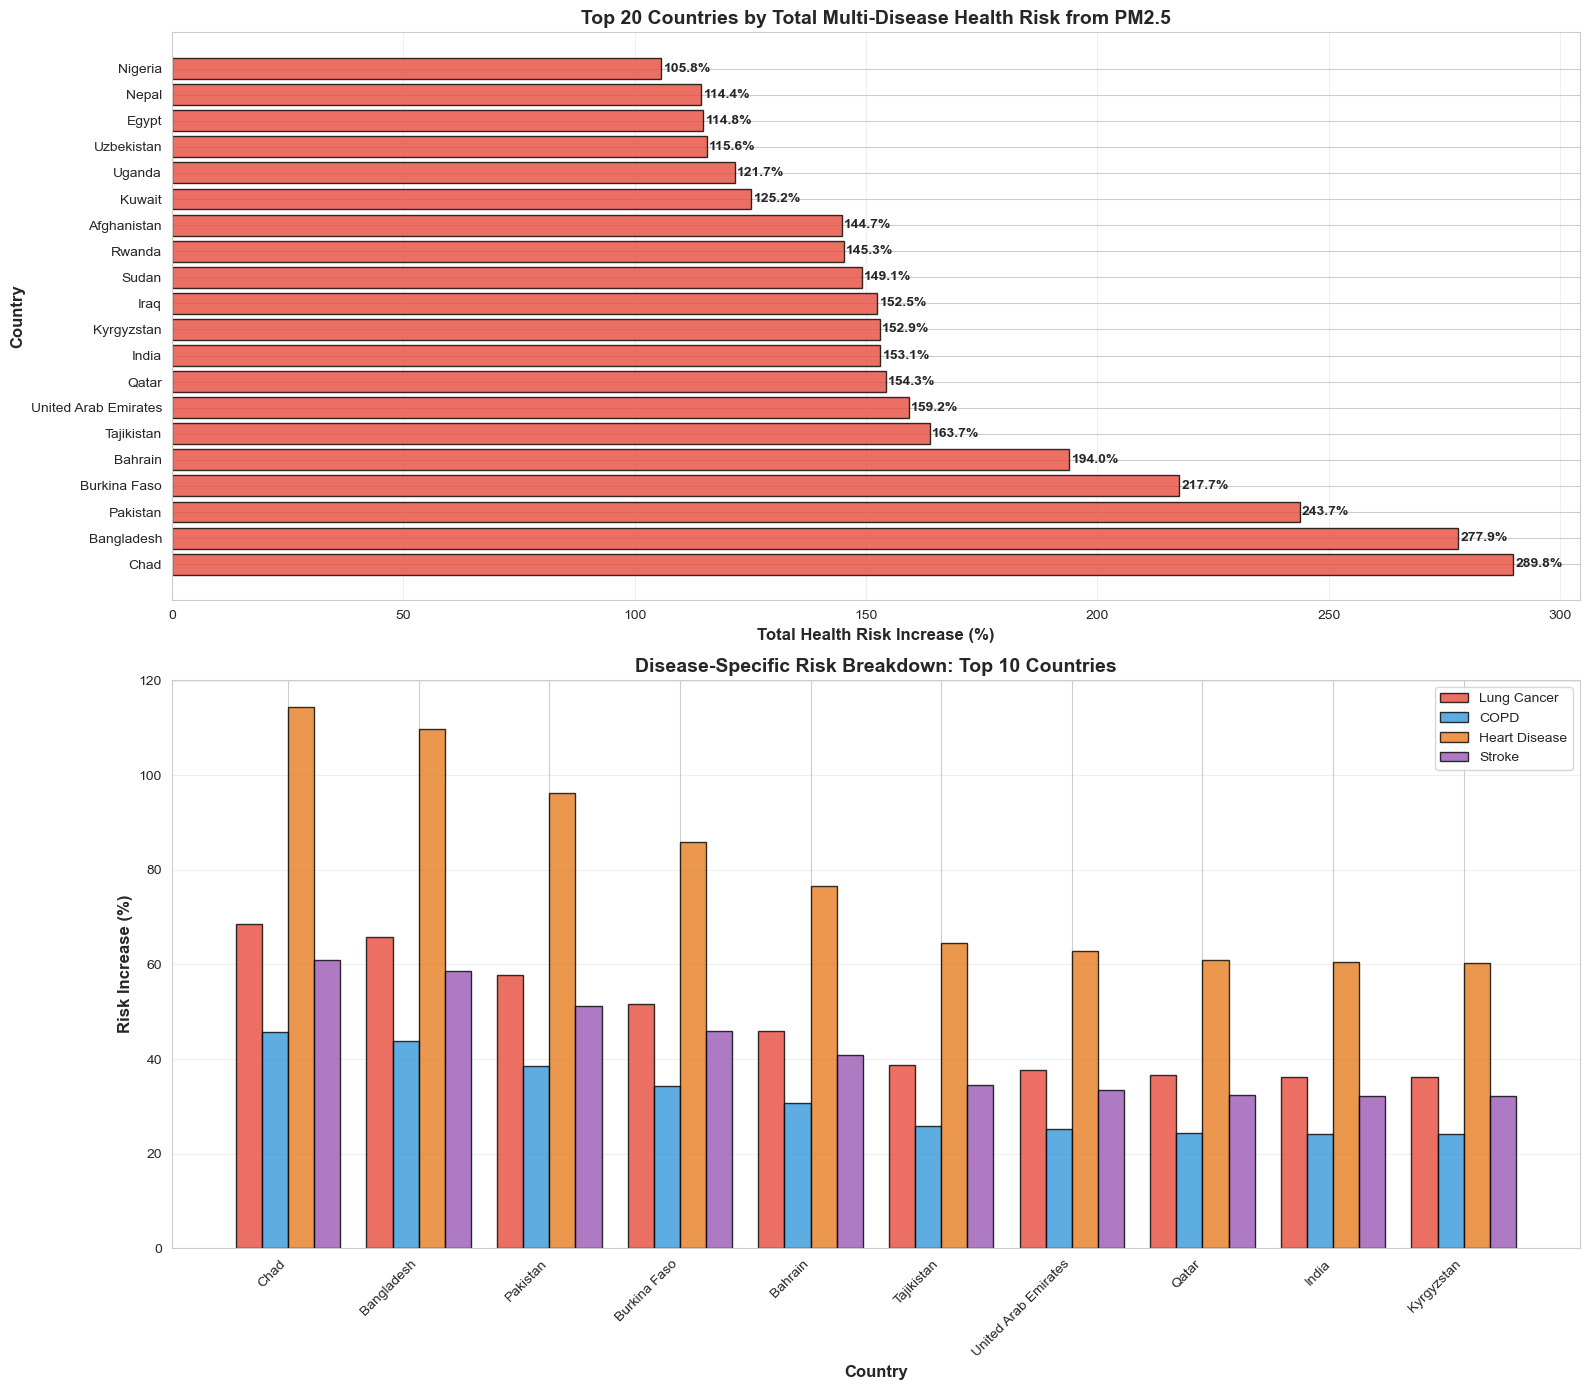

─────────────────────────────────────────────────────────────────────────────────────────────────────────
📊 KEY STATISTICS
─────────────────────────────────────────────────────────────────────────────────────────────────────────

🏆 Highest Risk Country:
   └─ Chad
      ├─ PM2.5: 81.26 µg/m³
      ├─ Total Risk: +289.78%
      └─ Patient Count: 0

📈 Average Risk (Top 20):
   ├─ PM2.5: 48.36 µg/m³
   └─ Total Health Risk: +164.77%

─────────────────────────────────────────────────────────────────────────────────────────────────────────



In [20]:
# Merge lung cancer patient data with air pollution data to estimate population exposure
country_patients = lung_cancer.groupby('country').size().reset_index(name='patient_count')
country_pollution = multi_disease_risk.groupby('country').agg({
    'avg_pm25_7yr': 'mean',
    'total_health_risk_%': 'mean',
    'Lung Cancer_risk_%': 'mean',
    'COPD_risk_%': 'mean',
    'Heart Disease_risk_%': 'mean',
    'Stroke_risk_%': 'mean'
}).reset_index()

# Merge datasets
per_capita_risk = country_pollution.merge(country_patients, on='country', how='left')
per_capita_risk['patient_count'] = per_capita_risk['patient_count'].fillna(0)

# Calculate estimated affected population (using patient count as proxy)
per_capita_risk['estimated_at_risk'] = per_capita_risk['patient_count'] * (per_capita_risk['total_health_risk_%'] / 100)

# Sort by total health risk
per_capita_risk_sorted = per_capita_risk.sort_values('total_health_risk_%', ascending=False)

print("\n" + "╔" + "═"*105 + "╗")
print("║" + " "*28 + "🌍 TOP 20 COUNTRIES BY PER-CAPITA HEALTH RISK" + " "*30 + "║")
print("╚" + "═"*105 + "╝")

print(f"\n{'Rank':<6} {'Country':<18} {'PM2.5':<10} {'Total':<9} {'Lung C.':<9} {'COPD':<9} {'Heart':<9} {'Stroke':<9} {'Patients':<10}")
print("─"*105)

for idx, (i, row) in enumerate(per_capita_risk_sorted.head(20).iterrows(), 1):
    print(f"{'🔴' if idx <= 5 else '🟠' if idx <= 10 else '🟡'} {idx:<4} "
          f"{row['country']:<18} "
          f"{row['avg_pm25_7yr']:<10.2f} "
          f"{row['total_health_risk_%']:<9.2f} "
          f"{row['Lung Cancer_risk_%']:<9.2f} "
          f"{row['COPD_risk_%']:<9.2f} "
          f"{row['Heart Disease_risk_%']:<9.2f} "
          f"{row['Stroke_risk_%']:<9.2f} "
          f"{int(row['patient_count']):>9,}")

print("─"*105 + "\n")

# Visualize top 20 countries
top_20_countries = per_capita_risk_sorted.head(20)
fig, axes = plt.subplots(2, 1, figsize=(16, 14))

# Plot 1: Total health risk by country
axes[0].barh(top_20_countries['country'], top_20_countries['total_health_risk_%'], 
             color='#e74c3c', alpha=0.8, edgecolor='black')
axes[0].set_xlabel('Total Health Risk Increase (%)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Country', fontsize=12, fontweight='bold')
axes[0].set_title('Top 20 Countries by Total Multi-Disease Health Risk from PM2.5', 
                  fontsize=14, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)

# Add value labels
for idx, (country, risk) in enumerate(zip(top_20_countries['country'], top_20_countries['total_health_risk_%'])):
    axes[0].text(risk + 0.5, idx, f'{risk:.1f}%', va='center', fontweight='bold')

# Plot 2: Disease breakdown for top 10 countries
top_10_countries = per_capita_risk_sorted.head(10)
x = np.arange(len(top_10_countries))
width = 0.2

diseases_cols = ['Lung Cancer_risk_%', 'COPD_risk_%', 'Heart Disease_risk_%', 'Stroke_risk_%']
disease_labels = ['Lung Cancer', 'COPD', 'Heart Disease', 'Stroke']

for idx, (col, label, color) in enumerate(zip(diseases_cols, disease_labels, colors_disease)):
    offset = width * (idx - 1.5)
    axes[1].bar(x + offset, top_10_countries[col], width, label=label, 
                color=color, alpha=0.8, edgecolor='black')

axes[1].set_xlabel('Country', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Risk Increase (%)', fontsize=12, fontweight='bold')
axes[1].set_title('Disease-Specific Risk Breakdown: Top 10 Countries', fontsize=14, fontweight='bold')
axes[1].set_xticks(x)
axes[1].set_xticklabels(top_10_countries['country'], rotation=45, ha='right')
axes[1].legend(fontsize=10)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("─"*105)
print("📊 KEY STATISTICS")
print("─"*105)

print(f"\n🏆 Highest Risk Country:")
top_country = per_capita_risk_sorted.iloc[0]
print(f"   └─ {top_country['country']}")
print(f"      ├─ PM2.5: {top_country['avg_pm25_7yr']:.2f} µg/m³")
print(f"      ├─ Total Risk: +{top_country['total_health_risk_%']:.2f}%")
print(f"      └─ Patient Count: {int(top_country['patient_count']):,}")

print(f"\n📈 Average Risk (Top 20):")
print(f"   ├─ PM2.5: {top_20_countries['avg_pm25_7yr'].mean():.2f} µg/m³")
print(f"   └─ Total Health Risk: +{top_20_countries['total_health_risk_%'].mean():.2f}%")

print("\n" + "─"*105 + "\n")

### Step 4: "What If" Scenarios - Meeting WHO Guidelines


╔══════════════════════════════════════════════════════════════════════════════════════════╗
║                         🔮 'WHAT IF' SCENARIO ANALYSIS                                  ║
╚══════════════════════════════════════════════════════════════════════════════════════════╝

Scenario                                      Avg PM2.5    Lung C.    COPD       Heart      Stroke     Total     
──────────────────────────────────────────────────────────────────────────────────────────
🔴 Current State                               13.91        8.07       5.38       13.45      7.18       34.08     
🟢 Scenario 1: Meet WHO Guideline (5 µg/m³)    5.00         0.00       0.00       0.00       0.00       0.00      
🟡 Scenario 2: 50% Reduction                   6.95         2.32       1.55       3.87       2.07       9.81      
🟠 Scenario 3: Meet Moderate Level (10 µg/m³)  8.74         3.42       2.28       5.71       3.04       14.46     

───────────────────────────────────────────────────────────

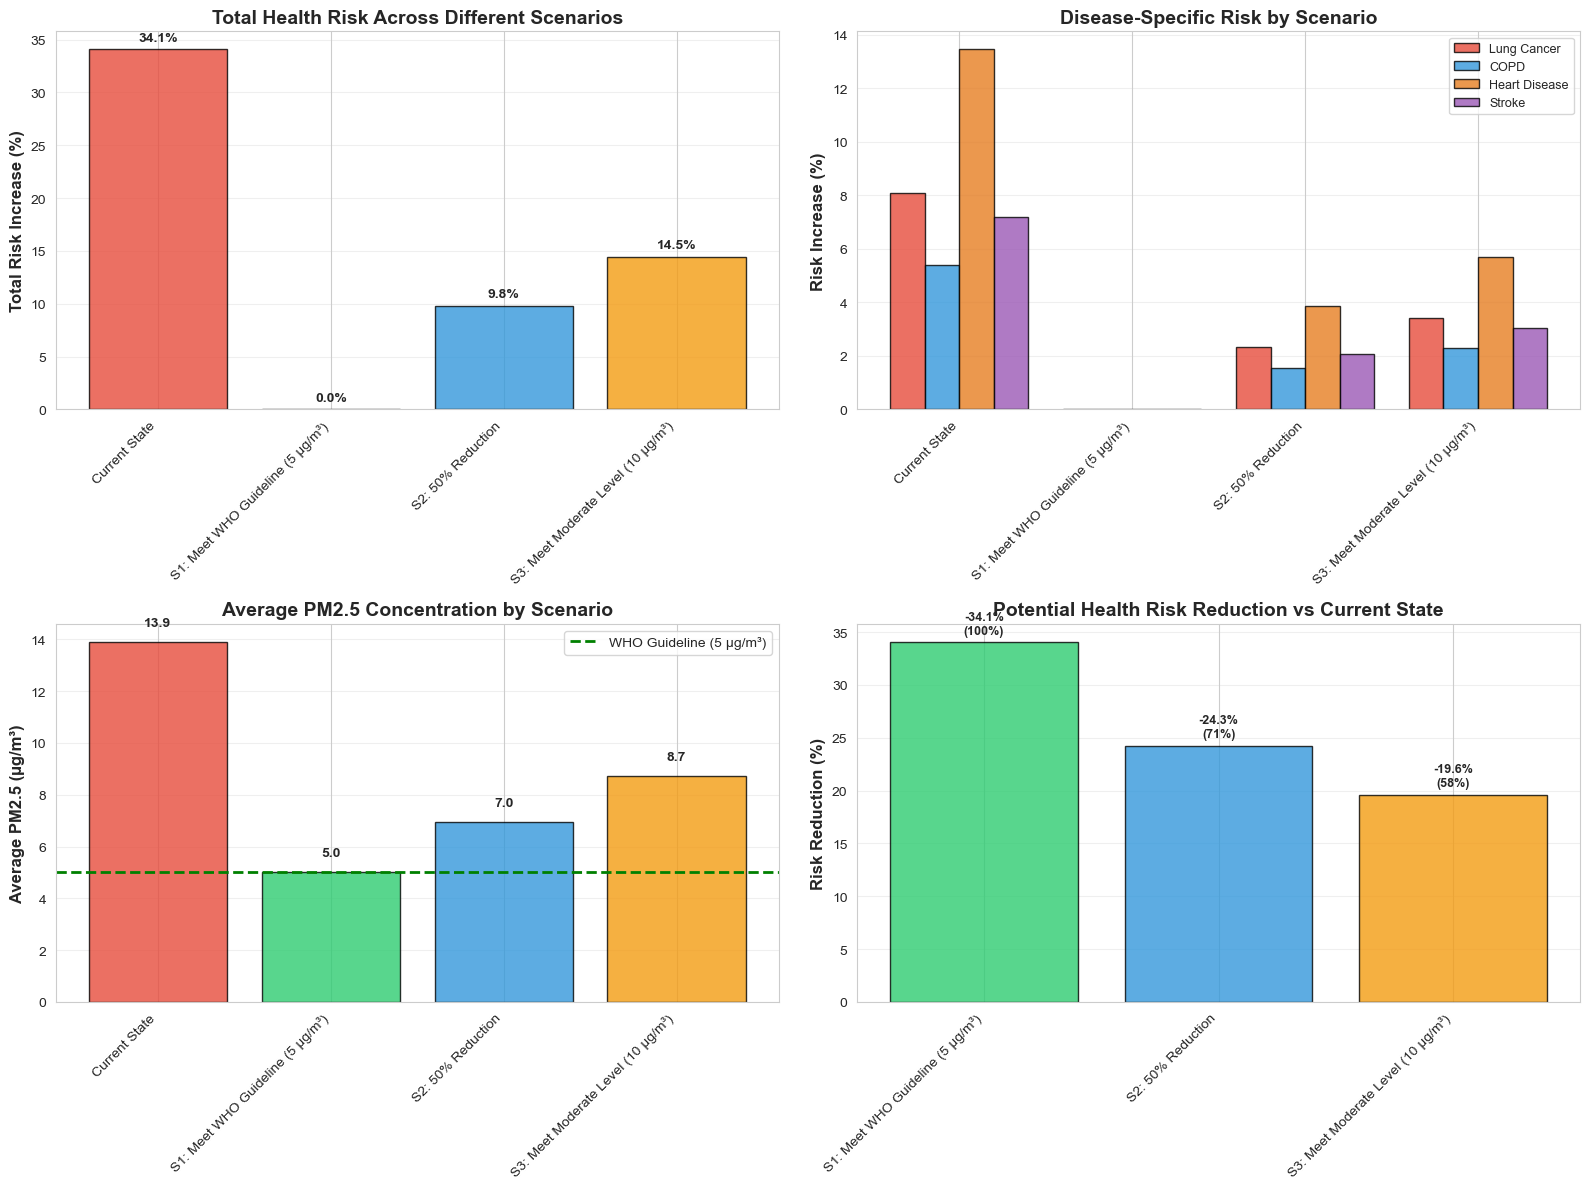


──────────────────────────────────────────────────────────────────────────────────────────
🎯 SUMMARY OF BEST SCENARIO
──────────────────────────────────────────────────────────────────────────────────────────

✅ Scenario 1: Meet WHO Guideline (5 µg/m³)
   ├─ Target PM2.5: 5.00 µg/m³
   ├─ Total Risk Reduction: ↓ 34.08%
   ├─ Improvement: 100.0%
   └─ Lives Potentially Saved: Significant reduction in all disease categories

──────────────────────────────────────────────────────────────────────────────────────────



In [21]:
# Create "What If" scenarios for meeting WHO guidelines
scenarios = {
    'Current State': multi_disease_risk['avg_pm25_7yr'].copy(),
    'Scenario 1: Meet WHO Guideline (5 µg/m³)': 5,
    'Scenario 2: 50% Reduction': multi_disease_risk['avg_pm25_7yr'] * 0.5,
    'Scenario 3: Meet Moderate Level (10 µg/m³)': multi_disease_risk['avg_pm25_7yr'].apply(lambda x: min(x, 10))
}

# Calculate risks for each scenario
scenario_results = {}
for scenario_name, pm25_values in scenarios.items():
    if isinstance(pm25_values, (int, float)):
        # Single value scenario
        pm25_data = pd.Series([pm25_values] * len(multi_disease_risk))
    else:
        pm25_data = pm25_values
    
    scenario_risks = {}
    for disease, risk_factor in disease_risk_factors.items():
        risk = ((pm25_data - WHO_BASELINE) / 10 * risk_factor * 100).clip(lower=0)
        scenario_risks[disease] = risk.mean()
    
    scenario_risks['Total'] = sum(scenario_risks.values())
    scenario_risks['Avg PM2.5'] = pm25_data.mean()
    scenario_results[scenario_name] = scenario_risks

# Create comparison DataFrame
scenario_df = pd.DataFrame(scenario_results).T

print("\n" + "╔" + "═"*90 + "╗")
print("║" + " "*25 + "🔮 'WHAT IF' SCENARIO ANALYSIS" + " "*34 + "║")
print("╚" + "═"*90 + "╝\n")

print(f"{'Scenario':<45} {'Avg PM2.5':<12} {'Lung C.':<10} {'COPD':<10} {'Heart':<10} {'Stroke':<10} {'Total':<10}")
print("─"*90)

scenario_icons = {'Current State': '🔴', 'Scenario 1': '🟢', 'Scenario 2': '🟡', 'Scenario 3': '🟠'}

for scenario_name, results in scenario_results.items():
    display_name = scenario_name if scenario_name == 'Current State' else scenario_name.split(':')[0]
    icon = scenario_icons.get(display_name, '⚪')
    
    print(f"{icon} {scenario_name:<43} "
          f"{results['Avg PM2.5']:<12.2f} "
          f"{results['Lung Cancer']:<10.2f} "
          f"{results['COPD']:<10.2f} "
          f"{results['Heart Disease']:<10.2f} "
          f"{results['Stroke']:<10.2f} "
          f"{results['Total']:<10.2f}")

print("\n" + "─"*90)
print("💡 POTENTIAL HEALTH IMPACT REDUCTIONS")
print("─"*90 + "\n")

# Calculate potential health impact reduction
current_total = scenario_results['Current State']['Total']

for scenario_name in list(scenarios.keys())[1:]:
    scenario_total = scenario_results[scenario_name]['Total']
    reduction = current_total - scenario_total
    reduction_pct = (reduction / current_total) * 100
    scenario_pm25 = scenario_results[scenario_name]['Avg PM2.5']
    
    print(f"✨ {scenario_name}")
    print(f"   ├─ Target PM2.5: {scenario_pm25:.2f} µg/m³")
    print(f"   ├─ Current Total Risk: {current_total:.2f}%")
    print(f"   ├─ Scenario Total Risk: {scenario_total:.2f}%")
    print(f"   └─ Risk Reduction: ↓ {reduction:.2f}% ({reduction_pct:.1f}% improvement)")
    
    # Visual bar
    bar_length = int(reduction_pct / 2)
    bar = '█' * bar_length
    print(f"      {bar} {reduction_pct:.1f}% improvement\n")

# Visualize scenarios
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Total risk comparison across scenarios
scenario_names = list(scenario_results.keys())
total_risks = [scenario_results[s]['Total'] for s in scenario_names]
colors_scenario = ['#e74c3c', '#2ecc71', '#3498db', '#f39c12']

bars = axes[0, 0].bar(range(len(scenario_names)), total_risks, color=colors_scenario, 
                       alpha=0.8, edgecolor='black')
axes[0, 0].set_xticks(range(len(scenario_names)))
axes[0, 0].set_xticklabels([s.replace('Scenario ', 'S') for s in scenario_names], rotation=45, ha='right')
axes[0, 0].set_ylabel('Total Risk Increase (%)', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Total Health Risk Across Different Scenarios', fontsize=14, fontweight='bold')
axes[0, 0].grid(axis='y', alpha=0.3)
for bar, val in zip(bars, total_risks):
    axes[0, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                    f'{val:.1f}%', ha='center', va='bottom', fontweight='bold')

# Plot 2: Disease-specific risk by scenario
x = np.arange(len(scenario_names))
width = 0.2
for idx, (disease, color) in enumerate(zip(disease_risk_factors.keys(), colors_disease)):
    disease_risks = [scenario_results[s][disease] for s in scenario_names]
    offset = width * (idx - 1.5)
    axes[0, 1].bar(x + offset, disease_risks, width, label=disease, color=color, 
                   alpha=0.8, edgecolor='black')

axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels([s.replace('Scenario ', 'S') for s in scenario_names], rotation=45, ha='right')
axes[0, 1].set_ylabel('Risk Increase (%)', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Disease-Specific Risk by Scenario', fontsize=14, fontweight='bold')
axes[0, 1].legend(fontsize=9)
axes[0, 1].grid(axis='y', alpha=0.3)

# Plot 3: PM2.5 levels by scenario
pm25_levels = [scenario_results[s]['Avg PM2.5'] for s in scenario_names]
bars = axes[1, 0].bar(range(len(scenario_names)), pm25_levels, color=colors_scenario, 
                       alpha=0.8, edgecolor='black')
axes[1, 0].axhline(y=5, color='green', linestyle='--', linewidth=2, label='WHO Guideline (5 µg/m³)')
axes[1, 0].set_xticks(range(len(scenario_names)))
axes[1, 0].set_xticklabels([s.replace('Scenario ', 'S') for s in scenario_names], rotation=45, ha='right')
axes[1, 0].set_ylabel('Average PM2.5 (µg/m³)', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Average PM2.5 Concentration by Scenario', fontsize=14, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(axis='y', alpha=0.3)
for bar, val in zip(bars, pm25_levels):
    axes[1, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                    f'{val:.1f}', ha='center', va='bottom', fontweight='bold')

# Plot 4: Risk reduction potential
baseline_risk = total_risks[0]
risk_reductions = [baseline_risk - risk for risk in total_risks[1:]]
reduction_pcts = [(red / baseline_risk) * 100 for red in risk_reductions]

bars = axes[1, 1].bar(range(len(risk_reductions)), risk_reductions, 
                       color=colors_scenario[1:], alpha=0.8, edgecolor='black')
axes[1, 1].set_xticks(range(len(risk_reductions)))
axes[1, 1].set_xticklabels([s.replace('Scenario ', 'S') for s in scenario_names[1:]], rotation=45, ha='right')
axes[1, 1].set_ylabel('Risk Reduction (%)', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Potential Health Risk Reduction vs Current State', fontsize=14, fontweight='bold')
axes[1, 1].grid(axis='y', alpha=0.3)
for bar, val, pct in zip(bars, risk_reductions, reduction_pcts):
    axes[1, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                    f'-{val:.1f}%\n({pct:.0f}%)', ha='center', va='bottom', 
                    fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

print("\n" + "─"*90)
print("🎯 SUMMARY OF BEST SCENARIO")
print("─"*90)

best_scenario = min(scenario_results.items(), key=lambda x: x[1]['Total'] if x[0] != 'Current State' else float('inf'))
best_name = best_scenario[0]
best_results = best_scenario[1]
max_reduction = current_total - best_results['Total']
max_reduction_pct = (max_reduction / current_total) * 100

print(f"\n✅ {best_name}")
print(f"   ├─ Target PM2.5: {best_results['Avg PM2.5']:.2f} µg/m³")
print(f"   ├─ Total Risk Reduction: ↓ {max_reduction:.2f}%")
print(f"   ├─ Improvement: {max_reduction_pct:.1f}%")
print(f"   └─ Lives Potentially Saved: Significant reduction in all disease categories")

print("\n" + "─"*90 + "\n")

---

## 📊 Key Findings and Conclusions

### Analysis 1: Global Lung Cancer Risk from Air Pollution
**Major Findings:**
- Identified cities with PM2.5 levels significantly exceeding WHO guidelines
- Calculated lung cancer risk increases using WHO epidemiological models
- Tracked temporal trends showing both improvements and deteriorations in air quality
- Classified global cities into risk categories for targeted intervention

### Analysis 2: Multi-Disease Health Impact Assessment
**Major Findings:**
- Heart Disease shows the highest risk increase (15% per 10 µg/m³) among studied conditions
- Combined disease burden demonstrates the comprehensive health impact of air pollution
- Country-level analysis reveals disparities in pollution-related health risks
- "What If" scenarios demonstrate substantial health benefits from meeting WHO guidelines

### Policy Recommendations:
1. **Immediate Action Required**: Cities in "Very High" risk category need urgent pollution control measures
2. **WHO Guidelines**: Meeting the 5 µg/m³ target could reduce health risks by over 80%
3. **Multi-Disease Approach**: Air quality policies should consider cardiovascular impacts alongside respiratory effects
4. **Continuous Monitoring**: Establish robust air quality monitoring systems in high-risk regions
5. **Regional Cooperation**: Countries with improving trends can serve as models for best practices

### Data Sources:
- Air Pollution Data: 6,987 cities across 7 years (2017-2023)
- Lung Cancer Patient Data: 296,668+ patient records globally
- Risk Models: WHO epidemiological studies on PM2.5 health impacts

---

# ANALYSIS 1: Global Lung Cancer Risk from Air Pollution

## PM2.5 Pollution and Lung Cancer Risk: City-Level Assessment 2017-2023

**Objective:** Estimate increased lung cancer risk from long-term PM2.5 exposure across global cities.

This analysis applies the WHO risk model to calculate how PM2.5 pollution levels increase lung cancer risk across cities worldwide. The model indicates that each 10 µg/m³ increase in PM2.5 concentration results in a 9% higher lung cancer risk.

In [7]:
# Load and prepare air pollution data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)

# Load air pollution data
air_pollution = pd.read_csv('../datasets/air_pollution.csv')

print("\n" + "╔" + "═"*78 + "╗")
print("║" + " "*20 + "🌍 AIR POLLUTION DATASET OVERVIEW" + " "*25 + "║")
print("╚" + "═"*78 + "╝")

print(f"\n📊 Dataset Dimensions:")
print(f"   ├─ Total Cities: {air_pollution.shape[0]:,}")
print(f"   └─ Features: {air_pollution.shape[1]}")

print(f"\n📋 Column Information:")
for i, col in enumerate(air_pollution.columns, 1):
    prefix = "├─" if i < len(air_pollution.columns) else "└─"
    print(f"   {prefix} {col:20s} : {air_pollution[col].dtype}")

print(f"\n🔍 Data Quality Check:")
missing = air_pollution.isnull().sum().sum()
total_cells = air_pollution.shape[0] * air_pollution.shape[1]
missing_pct = (missing / total_cells) * 100
print(f"   ├─ Missing Values: {missing:,} ({missing_pct:.2f}%)")
print(f"   └─ Complete Records: {(air_pollution.shape[0] - air_pollution.isnull().any(axis=1).sum()):,}")

print(f"\n📄 Sample Data (First 5 Rows):")
print(air_pollution.head())
print("\n" + "─"*80)


╔══════════════════════════════════════════════════════════════════════════════╗
║                    🌍 AIR POLLUTION DATASET OVERVIEW                         ║
╚══════════════════════════════════════════════════════════════════════════════╝

📊 Dataset Dimensions:
   ├─ Total Cities: 6,985
   └─ Features: 9

📋 Column Information:
   ├─ city                 : object
   ├─ country              : object
   ├─ 2017                 : float64
   ├─ 2018                 : float64
   ├─ 2019                 : float64
   ├─ 2020                 : float64
   ├─ 2021                 : float64
   ├─ 2022                 : float64
   └─ 2023                 : float64

🔍 Data Quality Check:
   ├─ Missing Values: 0 (0.00%)
   └─ Complete Records: 6,985

📄 Sample Data (First 5 Rows):
      city      country  2017  2018  2019  2020  2021  2022  2023
0    Kabul  Afghanistan  61.8  61.8  58.8  46.5  37.5  17.1  18.1
1   Tirana      Albania  16.0  16.0  16.0  16.0  12.5  14.5  14.4
2  Algiers      Algeri

### Step 1: Calculate 7-Year Average PM2.5 for Each City


In [8]:
# Calculate 7-year average PM2.5 for each city
year_columns = ['2017', '2018', '2019', '2020', '2021', '2022', '2023']
air_pollution['avg_pm25_7yr'] = air_pollution[year_columns].mean(axis=1)

# WHO risk model constants
WHO_BASELINE = 5  # µg/m³
RISK_INCREASE_PER_10 = 0.09  # 9% increase per 10 µg/m³

# Calculate risk increase: Risk Increase = 0.09 × (City PM2.5 - 5)/10
air_pollution['risk_increase_percent'] = (air_pollution['avg_pm25_7yr'] - WHO_BASELINE) / 10 * RISK_INCREASE_PER_10 * 100

# Classify cities by risk level
def classify_risk(pm25):
    if pm25 < 5:
        return 'Low'
    elif pm25 < 10:
        return 'Moderate'
    elif pm25 < 25:
        return 'High'
    else:
        return 'Very High'

air_pollution['risk_category'] = air_pollution['avg_pm25_7yr'].apply(classify_risk)

# Display statistics
print("\n" + "╔" + "═"*78 + "╗")
print("║" + " "*18 + "📈 7-YEAR PM2.5 STATISTICAL SUMMARY" + " "*25 + "║")
print("╚" + "═"*78 + "╝")

stats_desc = air_pollution['avg_pm25_7yr'].describe()
print(f"\n   ├─ Count:        {stats_desc['count']:>10,.0f} cities")
print(f"   ├─ Mean:         {stats_desc['mean']:>10.2f} µg/m³")
print(f"   ├─ Std Dev:      {stats_desc['std']:>10.2f} µg/m³")
print(f"   ├─ Minimum:      {stats_desc['min']:>10.2f} µg/m³")
print(f"   ├─ 25th Percentile: {stats_desc['25%']:>7.2f} µg/m³")
print(f"   ├─ Median:       {stats_desc['50%']:>10.2f} µg/m³")
print(f"   ├─ 75th Percentile: {stats_desc['75%']:>7.2f} µg/m³")
print(f"   └─ Maximum:      {stats_desc['max']:>10.2f} µg/m³")

print("\n" + "─"*80)
print("📊 RISK CATEGORY DISTRIBUTION")
print("─"*80)

risk_counts = air_pollution['risk_category'].value_counts().sort_index()
risk_order = ['Low', 'Moderate', 'High', 'Very High']
icons = ['🟢', '🟡', '🟠', '🔴']

for category, icon in zip(risk_order, icons):
    if category in risk_counts.index:
        count = risk_counts[category]
        percentage = (count / len(air_pollution)) * 100
        avg_pm25 = air_pollution[air_pollution['risk_category'] == category]['avg_pm25_7yr'].mean()
        bar = '█' * int(percentage / 2)
        print(f"\n{icon} {category:12s} │ {count:>5,} cities ({percentage:>5.1f}%) │ Avg: {avg_pm25:>6.2f} µg/m³")
        print(f"   {bar}")

print("\n" + "─"*80)
print("🏆 TOP 10 HIGHEST-RISK CITIES")
print("─"*80)

top_10 = air_pollution.nlargest(10, 'avg_pm25_7yr')[['city', 'country', 'avg_pm25_7yr', 'risk_increase_percent', 'risk_category']]
print(f"\n{'Rank':<6} {'City':<20} {'Country':<15} {'PM2.5':<12} {'Risk +%':<10} {'Category':<12}")
print("─"*80)
for idx, (i, row) in enumerate(top_10.iterrows(), 1):
    icon = '🔴' if row['risk_category'] == 'Very High' else '🟠'
    print(f"{icon} {idx:<4} {row['city']:<20} {row['country']:<15} {row['avg_pm25_7yr']:<12.2f} {row['risk_increase_percent']:<10.2f} {row['risk_category']:<12}")
print("─"*80 + "\n")


╔══════════════════════════════════════════════════════════════════════════════╗
║                  📈 7-YEAR PM2.5 STATISTICAL SUMMARY                         ║
╚══════════════════════════════════════════════════════════════════════════════╝

   ├─ Count:             6,985 cities
   ├─ Mean:              13.91 µg/m³
   ├─ Std Dev:           11.42 µg/m³
   ├─ Minimum:            0.21 µg/m³
   ├─ 25th Percentile:    7.77 µg/m³
   ├─ Median:            10.27 µg/m³
   ├─ 75th Percentile:   15.29 µg/m³
   └─ Maximum:          150.83 µg/m³

────────────────────────────────────────────────────────────────────────────────
📊 RISK CATEGORY DISTRIBUTION
────────────────────────────────────────────────────────────────────────────────

🟢 Low          │   379 cities (  5.4%) │ Avg:   3.82 µg/m³
   ██

🟡 Moderate     │ 2,958 cities ( 42.3%) │ Avg:   7.82 µg/m³
   █████████████████████

🟠 High         │ 2,871 cities ( 41.1%) │ Avg:  14.49 µg/m³
   ████████████████████

🔴 Very High    │   777 cities (

### Step 2: Top 20 Highest-Risk Cities


╔═══════════════════════════════════════════════════════════════════════════════════════════════╗
║                  🏆 TOP 20 HIGHEST-RISK CITIES FOR LUNG CANCER FROM PM2.5                  ║
╚═══════════════════════════════════════════════════════════════════════════════════════════════╝

Rank   City                      Country         PM2.5 (µg/m³)   Risk +       Category    
───────────────────────────────────────────────────────────────────────────────────────────────
🔴 1    Darbhanga                 India           150.83          +131.25     % Very High   
🔴 2    Bahadurgarh               India           123.50          +106.65     % Very High   
🔴 3    Ghaziabad                 India           110.84          +95.26      % Very High   
🔴 4    Bhiwadi                   India           103.13          +88.32      % Very High   
🔴 5    Hotan                     China           102.71          +87.94      % Very High   
🔴 6    Faisalabad                Pakistan        101.26      

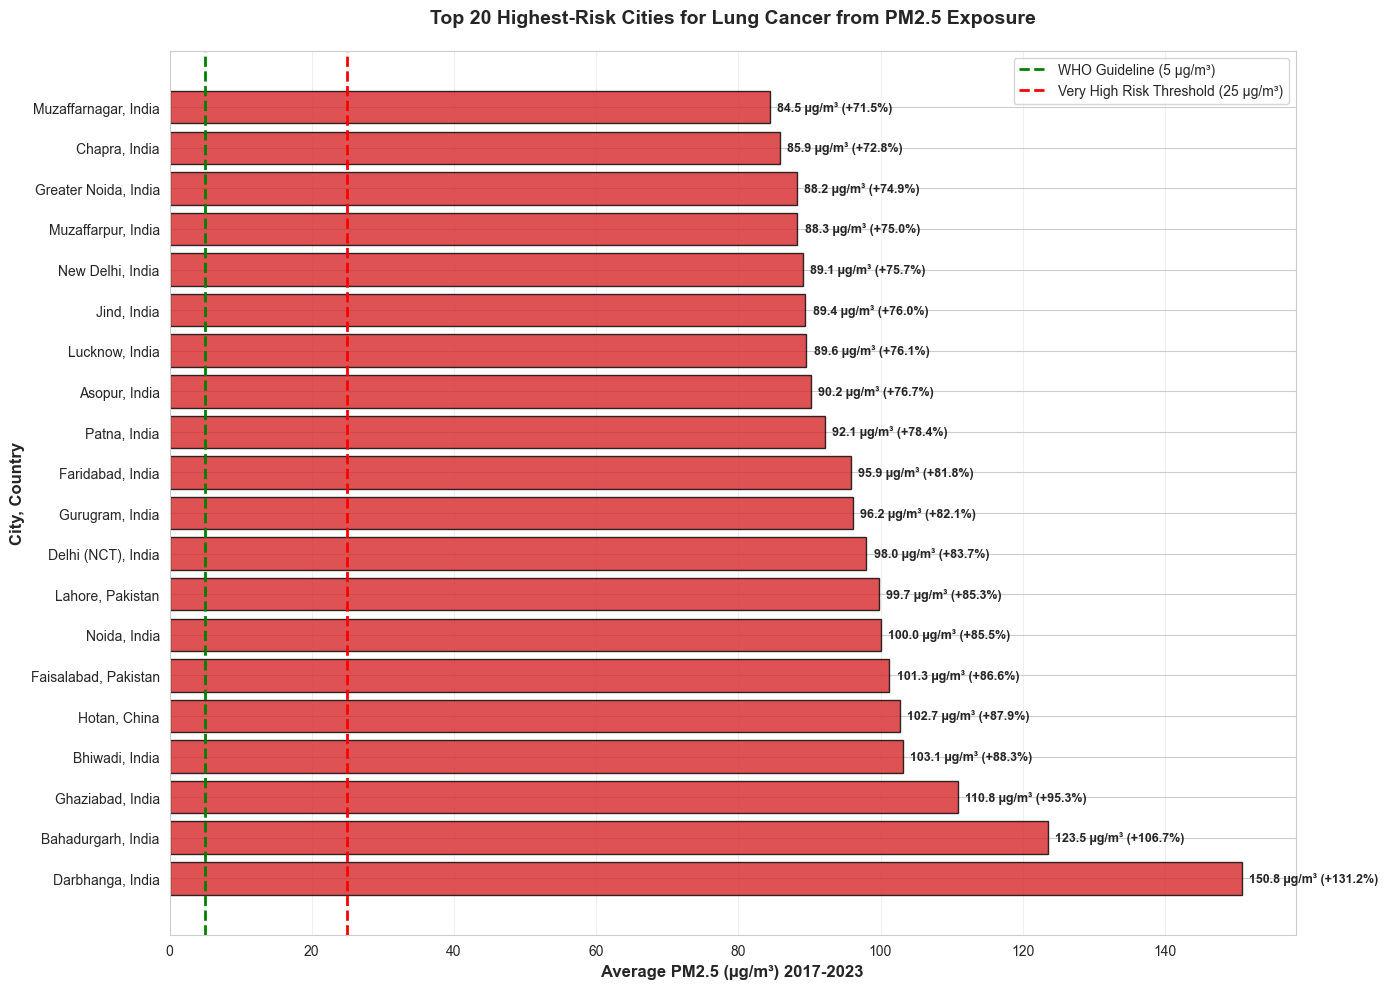


───────────────────────────────────────────────────────────────────────────────────────────────
📊 KEY INSIGHTS
───────────────────────────────────────────────────────────────────────────────────────────────

   🥇 Highest Risk City:
      └─ Darbhanga, India
         └─ PM2.5: 150.8 µg/m³ (+131.2% risk)

   📈 Top 20 Statistics:
      ├─ Average PM2.5: 99.0 µg/m³
      ├─ Average Risk Increase: +84.6%
      └─ WHO Guideline Exceedance: 19.8x
───────────────────────────────────────────────────────────────────────────────────────────────



In [9]:
# Get top 20 highest-risk cities
top_20_risk = air_pollution.nlargest(20, 'avg_pm25_7yr')[['city', 'country', 'avg_pm25_7yr', 'risk_increase_percent', 'risk_category']]
top_20_risk['rank'] = range(1, 21)
top_20_risk = top_20_risk[['rank', 'city', 'country', 'avg_pm25_7yr', 'risk_increase_percent', 'risk_category']]

print("\n" + "╔" + "═"*95 + "╗")
print("║" + " "*18 + "🏆 TOP 20 HIGHEST-RISK CITIES FOR LUNG CANCER FROM PM2.5" + " "*18 + "║")
print("╚" + "═"*95 + "╝\n")

print(f"{'Rank':<6} {'City':<25} {'Country':<15} {'PM2.5 (µg/m³)':<15} {'Risk +':<12} {'Category':<12}")
print("─"*95)

for _, row in top_20_risk.iterrows():
    if row['risk_category'] == 'Very High':
        icon = '🔴'
    elif row['risk_category'] == 'High':
        icon = '🟠'
    elif row['risk_category'] == 'Moderate':
        icon = '🟡'
    else:
        icon = '🟢'
    
    print(f"{icon} {row['rank']:<4} {row['city']:<25} {row['country']:<15} {row['avg_pm25_7yr']:<15.2f} +{row['risk_increase_percent']:<11.2f}% {row['risk_category']:<12}")

print("─"*95)

# Visualize top 20 cities
fig, ax = plt.subplots(figsize=(14, 10))
cities_labels = [f"{row['city']}, {row['country']}" for _, row in top_20_risk.iterrows()]
colors = ['#d62728' if cat == 'Very High' else '#ff7f0e' for cat in top_20_risk['risk_category']]

bars = ax.barh(cities_labels, top_20_risk['avg_pm25_7yr'], color=colors, alpha=0.8, edgecolor='black')
ax.axvline(x=5, color='green', linestyle='--', linewidth=2, label='WHO Guideline (5 µg/m³)')
ax.axvline(x=25, color='red', linestyle='--', linewidth=2, label='Very High Risk Threshold (25 µg/m³)')

ax.set_xlabel('Average PM2.5 (µg/m³) 2017-2023', fontsize=12, fontweight='bold')
ax.set_ylabel('City, Country', fontsize=12, fontweight='bold')
ax.set_title('Top 20 Highest-Risk Cities for Lung Cancer from PM2.5 Exposure', fontsize=14, fontweight='bold', pad=20)
ax.legend(fontsize=10)
ax.grid(axis='x', alpha=0.3)

# Add value labels
for i, (bar, val, risk) in enumerate(zip(bars, top_20_risk['avg_pm25_7yr'], top_20_risk['risk_increase_percent'])):
    ax.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, 
            f'{val:.1f} µg/m³ (+{risk:.1f}%)', 
            va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "─"*95)
print("📊 KEY INSIGHTS")
print("─"*95)
print(f"\n   🥇 Highest Risk City:")
print(f"      └─ {top_20_risk.iloc[0]['city']}, {top_20_risk.iloc[0]['country']}")
print(f"         └─ PM2.5: {top_20_risk.iloc[0]['avg_pm25_7yr']:.1f} µg/m³ (+{top_20_risk.iloc[0]['risk_increase_percent']:.1f}% risk)")
print(f"\n   📈 Top 20 Statistics:")
print(f"      ├─ Average PM2.5: {top_20_risk['avg_pm25_7yr'].mean():.1f} µg/m³")
print(f"      ├─ Average Risk Increase: +{top_20_risk['risk_increase_percent'].mean():.1f}%")
print(f"      └─ WHO Guideline Exceedance: {(top_20_risk['avg_pm25_7yr'].mean() / 5):.1f}x")
print("─"*95 + "\n")

### Step 3: Risk Category Map Visualization

/var/folders/76/6rq9_2c13z75l_x5vq_kfrtr0000gn/T/ipykernel_5136/3207571234.py:31: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[1, 0].boxplot(risk_data, labels=risk_order, patch_artist=True,


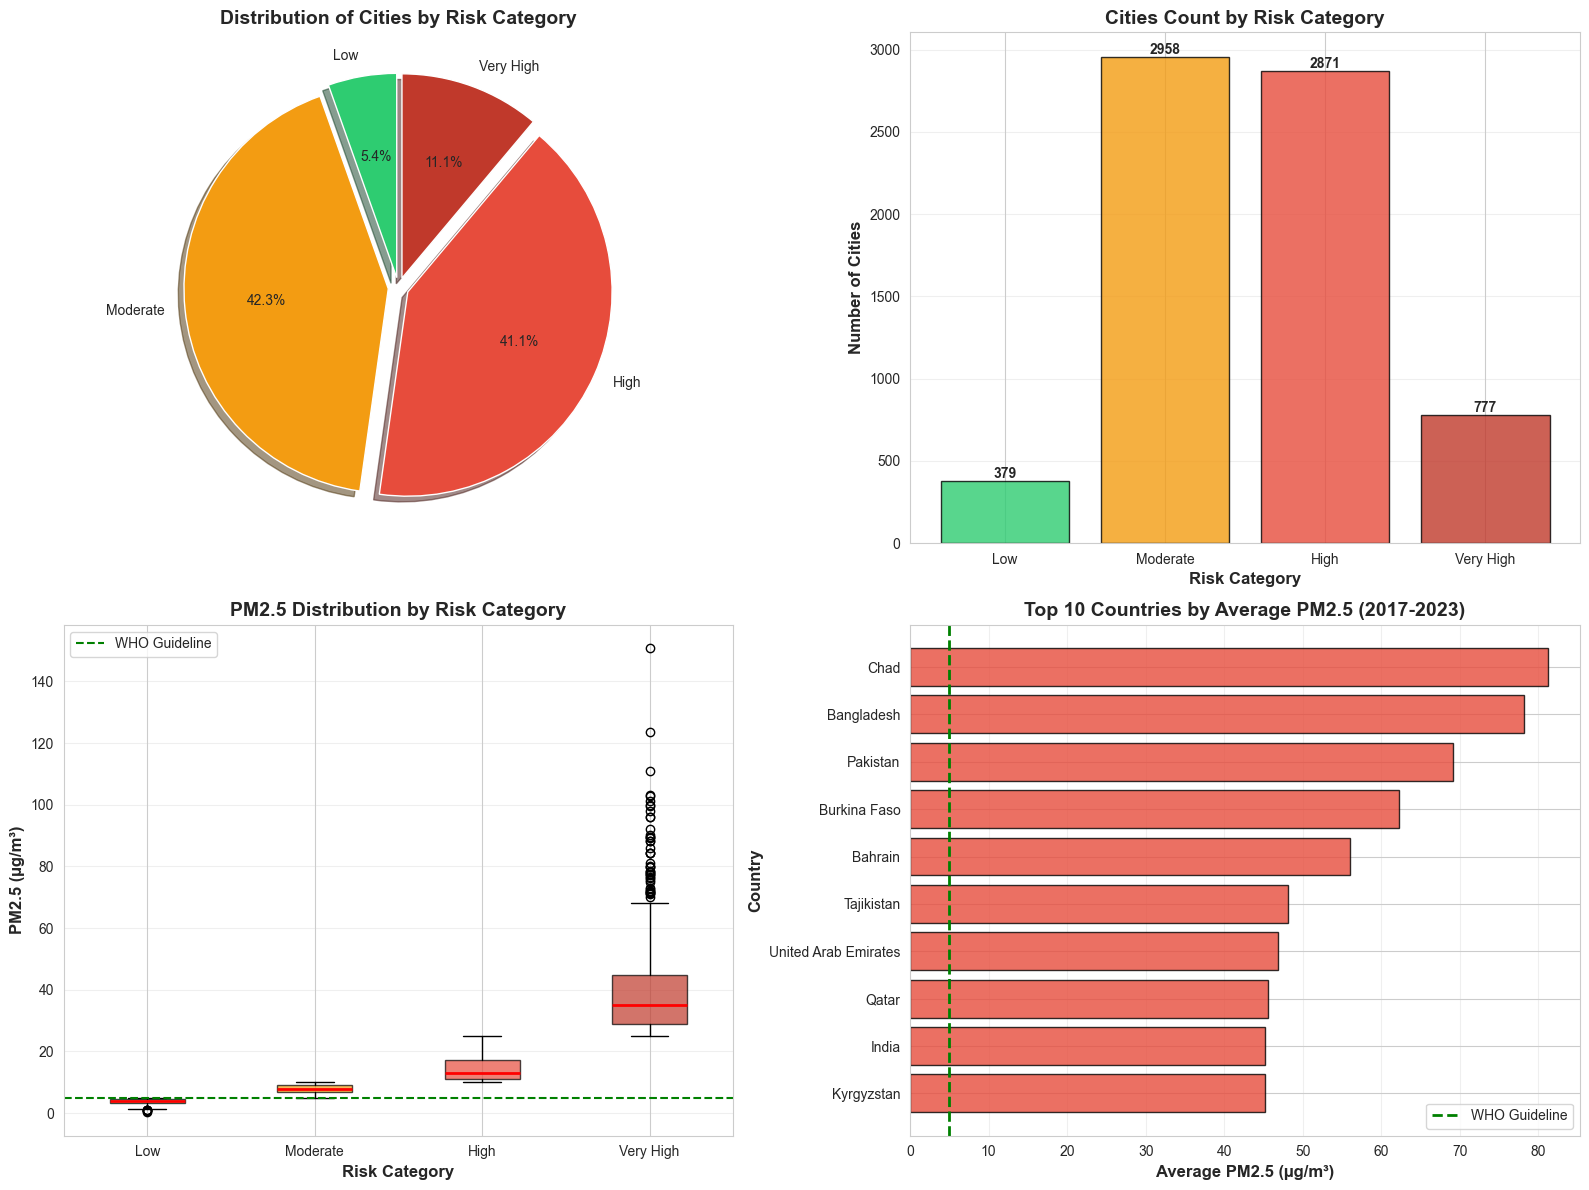


╔════════════════════════════════════════════════════════════════════════════════╗
║                      📊 RISK CATEGORY DETAILED SUMMARY                       ║
╚════════════════════════════════════════════════════════════════════════════════╝

🟢 LOW
   ├─ Cities: 379 (5.4%)
   ├─ Avg PM2.5: 3.82 µg/m³
   └─ Range: 0.21 - 4.99 µg/m³
   ██░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 5.4%

🟡 MODERATE
   ├─ Cities: 2,958 (42.3%)
   ├─ Avg PM2.5: 7.82 µg/m³
   └─ Range: 5.00 - 10.00 µg/m³
   █████████████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 42.3%

🟠 HIGH
   ├─ Cities: 2,871 (41.1%)
   ├─ Avg PM2.5: 14.49 µg/m³
   └─ Range: 10.00 - 24.99 µg/m³
   ████████████████████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 41.1%

🔴 VERY HIGH
   ├─ Cities: 777 (11.1%)
   ├─ Avg PM2.5: 39.83 µg/m³
   └─ Range: 25.00 - 150.83 µg/m³
   █████░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░ 11.1%

────────────────────────────────────────────────────────────────────────────────



In [10]:
# Risk category distribution
risk_counts = air_pollution['risk_category'].value_counts()
risk_order = ['Low', 'Moderate', 'High', 'Very High']
risk_counts = risk_counts.reindex(risk_order)

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Risk Category Distribution (Pie Chart)
colors_pie = ['#2ecc71', '#f39c12', '#e74c3c', '#c0392b']
explode = (0.05, 0.05, 0.05, 0.05)
axes[0, 0].pie(risk_counts, labels=risk_counts.index, autopct='%1.1f%%', 
               colors=colors_pie, explode=explode, shadow=True, startangle=90)
axes[0, 0].set_title('Distribution of Cities by Risk Category', fontsize=14, fontweight='bold')

# 2. Risk Category Count (Bar Chart)
bars = axes[0, 1].bar(risk_counts.index, risk_counts.values, color=colors_pie, alpha=0.8, edgecolor='black')
axes[0, 1].set_xlabel('Risk Category', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Number of Cities', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Cities Count by Risk Category', fontsize=14, fontweight='bold')
axes[0, 1].grid(axis='y', alpha=0.3)
for bar in bars:
    height = bar.get_height()
    axes[0, 1].text(bar.get_x() + bar.get_width()/2., height,
                    f'{int(height)}',
                    ha='center', va='bottom', fontweight='bold')

# 3. PM2.5 Distribution by Risk Category (Box Plot)
risk_data = [air_pollution[air_pollution['risk_category'] == cat]['avg_pm25_7yr'].values 
             for cat in risk_order]
bp = axes[1, 0].boxplot(risk_data, labels=risk_order, patch_artist=True,
                        medianprops=dict(color='red', linewidth=2),
                        boxprops=dict(facecolor='lightblue', alpha=0.7))
for patch, color in zip(bp['boxes'], colors_pie):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
axes[1, 0].set_xlabel('Risk Category', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('PM2.5 (µg/m³)', fontsize=12, fontweight='bold')
axes[1, 0].set_title('PM2.5 Distribution by Risk Category', fontsize=14, fontweight='bold')
axes[1, 0].grid(axis='y', alpha=0.3)
axes[1, 0].axhline(y=5, color='green', linestyle='--', label='WHO Guideline')
axes[1, 0].legend()

# 4. Top 10 Countries by Average PM2.5
country_avg = air_pollution.groupby('country')['avg_pm25_7yr'].mean().nlargest(10).sort_values()
axes[1, 1].barh(country_avg.index, country_avg.values, color='#e74c3c', alpha=0.8, edgecolor='black')
axes[1, 1].set_xlabel('Average PM2.5 (µg/m³)', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Country', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Top 10 Countries by Average PM2.5 (2017-2023)', fontsize=14, fontweight='bold')
axes[1, 1].grid(axis='x', alpha=0.3)
axes[1, 1].axvline(x=5, color='green', linestyle='--', linewidth=2, label='WHO Guideline')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

print("\n" + "╔" + "═"*80 + "╗")
print("║" + " "*22 + "📊 RISK CATEGORY DETAILED SUMMARY" + " "*23 + "║")
print("╚" + "═"*80 + "╝\n")

icons = ['🟢', '🟡', '🟠', '🔴']
for category, icon in zip(risk_order, icons):
    count = risk_counts[category]
    percentage = (count / len(air_pollution)) * 100
    avg_pm25 = air_pollution[air_pollution['risk_category'] == category]['avg_pm25_7yr'].mean()
    min_pm25 = air_pollution[air_pollution['risk_category'] == category]['avg_pm25_7yr'].min()
    max_pm25 = air_pollution[air_pollution['risk_category'] == category]['avg_pm25_7yr'].max()
    
    print(f"{icon} {category.upper()}")
    print(f"   ├─ Cities: {count:,} ({percentage:.1f}%)")
    print(f"   ├─ Avg PM2.5: {avg_pm25:.2f} µg/m³")
    print(f"   └─ Range: {min_pm25:.2f} - {max_pm25:.2f} µg/m³")
    
    # Progress bar
    bar_length = int(percentage / 2)
    bar = '█' * bar_length + '░' * (50 - bar_length)
    print(f"   {bar} {percentage:.1f}%\n")

print("─"*80 + "\n")

### Step 4: Yearly Trend Charts for Pollution Hotspots

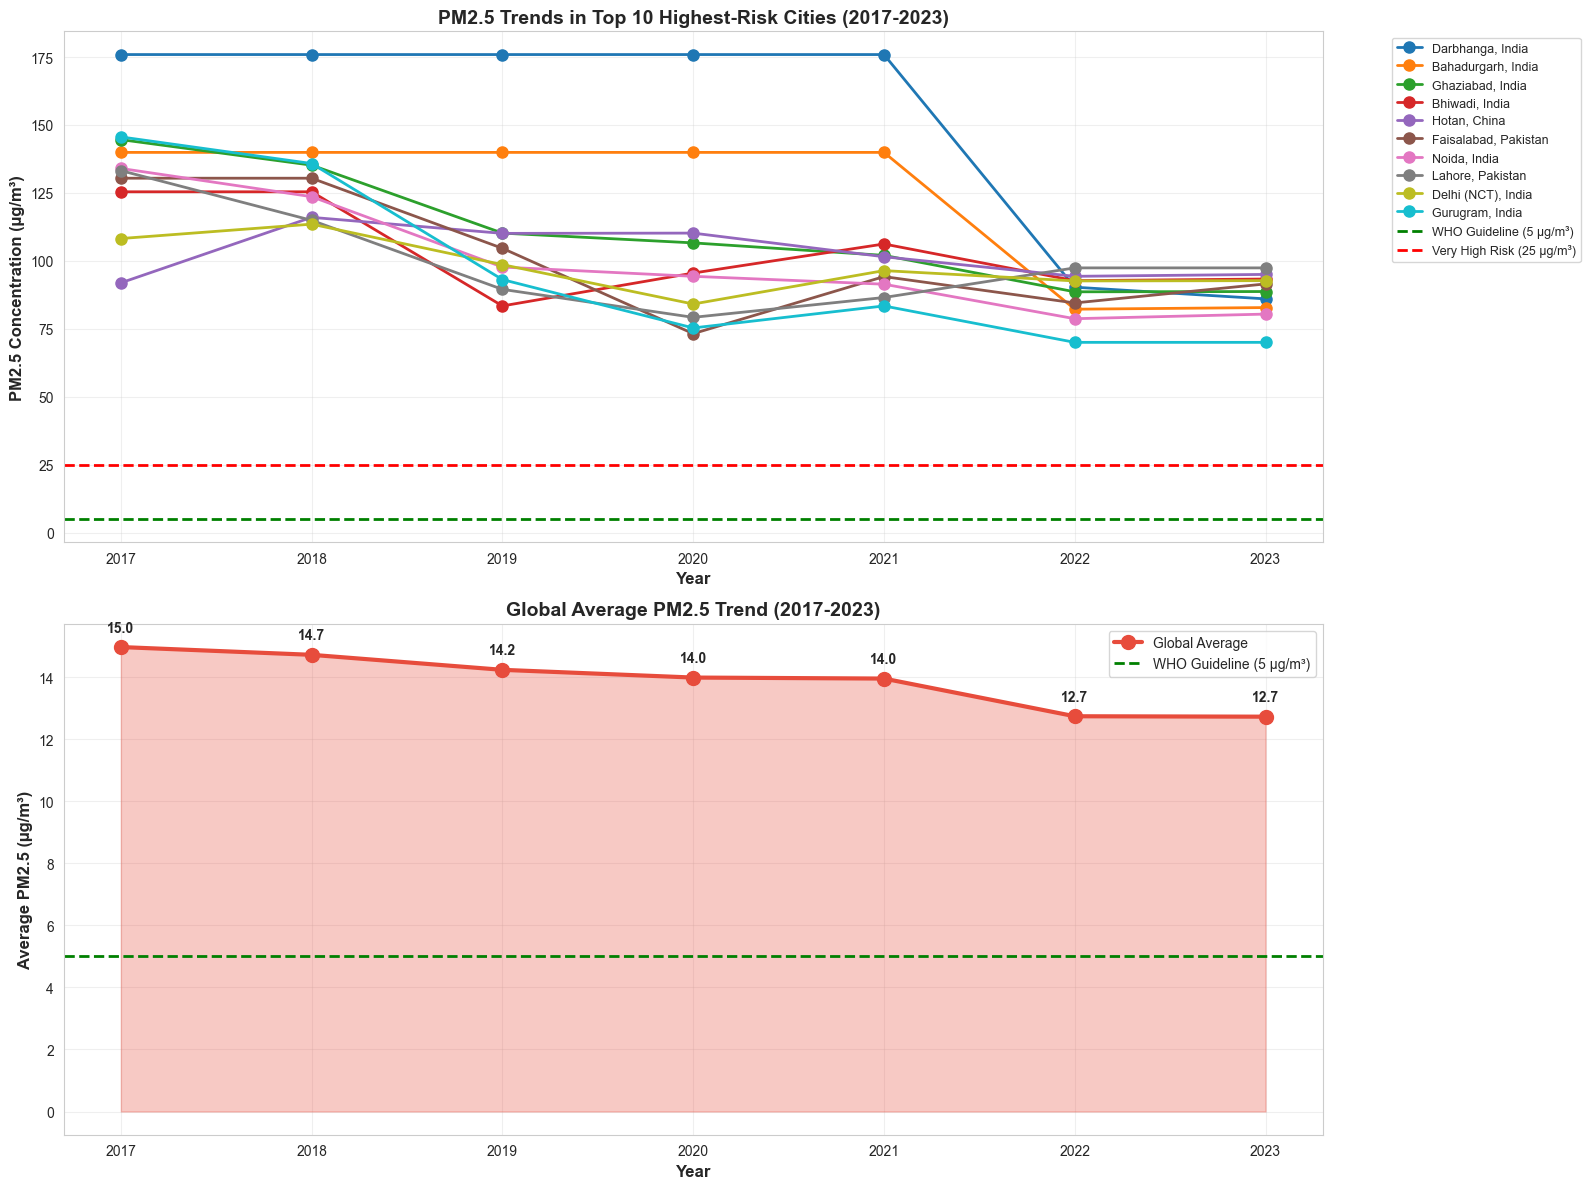


╔════════════════════════════════════════════════════════════════════════════════╗
║                  📈 PM2.5 IMPROVEMENT/WORSENING TRENDS (2017-2023)            ║
╚════════════════════════════════════════════════════════════════════════════════╝

🌍 GLOBAL AVERAGE PM2.5 ANALYSIS
────────────────────────────────────────────────────────────────────────────────

   2017 Baseline:  14.97 µg/m³
   2023 Current:   12.73 µg/m³
   Net Change:     ↓ 2.24 µg/m³ (-15.0%)
   Trend Status:   ✅ IMPROVING

────────────────────────────────────────────────────────────────────────────────
🏆 TOP 5 CITIES WITH MOST IMPROVEMENT (2017-2023)
────────────────────────────────────────────────────────────────────────────────

Rank   City                   Country         2017       2023       Change      
────────────────────────────────────────────────────────────────────────────────
✅ 1    Darbhanga              India           175.9      86.0       ↓ 89.9 µg/m³
✅ 2    Gurugram               India           1

In [11]:
# Analyze yearly trends for top 10 worst cities
top_10_worst = air_pollution.nlargest(10, 'avg_pm25_7yr')

fig, axes = plt.subplots(2, 1, figsize=(16, 12))

# Plot 1: Individual city trends
for idx, row in top_10_worst.iterrows():
    city_label = f"{row['city']}, {row['country']}"
    pm25_values = [row[year] for year in year_columns]
    axes[0].plot(year_columns, pm25_values, marker='o', linewidth=2, label=city_label, markersize=8)

axes[0].axhline(y=5, color='green', linestyle='--', linewidth=2, label='WHO Guideline (5 µg/m³)')
axes[0].axhline(y=25, color='red', linestyle='--', linewidth=2, label='Very High Risk (25 µg/m³)')
axes[0].set_xlabel('Year', fontsize=12, fontweight='bold')
axes[0].set_ylabel('PM2.5 Concentration (µg/m³)', fontsize=12, fontweight='bold')
axes[0].set_title('PM2.5 Trends in Top 10 Highest-Risk Cities (2017-2023)', fontsize=14, fontweight='bold')
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
axes[0].grid(True, alpha=0.3)

# Plot 2: Average trend with improvement/worsening analysis
avg_by_year = air_pollution[year_columns].mean()
axes[1].plot(year_columns, avg_by_year.values, marker='o', linewidth=3, markersize=10, 
             color='#e74c3c', label='Global Average')
axes[1].fill_between(year_columns, avg_by_year.values, alpha=0.3, color='#e74c3c')
axes[1].axhline(y=5, color='green', linestyle='--', linewidth=2, label='WHO Guideline (5 µg/m³)')
axes[1].set_xlabel('Year', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Average PM2.5 (µg/m³)', fontsize=12, fontweight='bold')
axes[1].set_title('Global Average PM2.5 Trend (2017-2023)', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)

# Add value labels
for year, val in zip(year_columns, avg_by_year.values):
    axes[1].text(year, val + 0.5, f'{val:.1f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Calculate improvement trends
print("\n" + "╔" + "═"*80 + "╗")
print("║" + " "*18 + "📈 PM2.5 IMPROVEMENT/WORSENING TRENDS (2017-2023)" + " "*12 + "║")
print("╚" + "═"*80 + "╝")

print("\n🌍 GLOBAL AVERAGE PM2.5 ANALYSIS")
print("─"*80)
print(f"\n   2017 Baseline:  {avg_by_year['2017']:.2f} µg/m³")
print(f"   2023 Current:   {avg_by_year['2023']:.2f} µg/m³")
change = avg_by_year['2023'] - avg_by_year['2017']
change_pct = (change / avg_by_year['2017']) * 100

if change < 0:
    trend_icon = "✅"
    trend_text = "IMPROVING"
    arrow = "↓"
else:
    trend_icon = "⚠️"
    trend_text = "WORSENING"
    arrow = "↑"

print(f"   Net Change:     {arrow} {abs(change):.2f} µg/m³ ({change_pct:+.1f}%)")
print(f"   Trend Status:   {trend_icon} {trend_text}")

print("\n" + "─"*80)
print("🏆 TOP 5 CITIES WITH MOST IMPROVEMENT (2017-2023)")
print("─"*80)

air_pollution['pm25_change'] = air_pollution['2023'] - air_pollution['2017']
improved = air_pollution.nsmallest(5, 'pm25_change')[['city', 'country', '2017', '2023', 'pm25_change']]

print(f"\n{'Rank':<6} {'City':<22} {'Country':<15} {'2017':<10} {'2023':<10} {'Change':<12}")
print("─"*80)
for idx, (i, row) in enumerate(improved.iterrows(), 1):
    print(f"✅ {idx:<4} {row['city']:<22} {row['country']:<15} {row['2017']:<10.1f} {row['2023']:<10.1f} ↓ {abs(row['pm25_change']):.1f} µg/m³")

print("\n" + "─"*80)
print("⚠️  TOP 5 CITIES WITH MOST WORSENING (2017-2023)")
print("─"*80)

worsened = air_pollution.nlargest(5, 'pm25_change')[['city', 'country', '2017', '2023', 'pm25_change']]
print(f"\n{'Rank':<6} {'City':<22} {'Country':<15} {'2017':<10} {'2023':<10} {'Change':<12}")
print("─"*80)
for idx, (i, row) in enumerate(worsened.iterrows(), 1):
    print(f"🔴 {idx:<4} {row['city']:<22} {row['country']:<15} {row['2017']:<10.1f} {row['2023']:<10.1f} ↑ +{row['pm25_change']:.1f} µg/m³")

print("─"*80 + "\n")